<a href="https://colab.research.google.com/github/obeabi/SDSDecember2020Challenge/blob/main/Preprocessing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by Abiola Obembe
# SDS October Challenge #4 - Hostel Price Prediction
2021-02-12

This month’s challenge is to build a data driven model determine a fair price for new hostels based on previous hostel data. Specifically, my objective is to predict the price of each hostel based on the data provided.

## Step 1: Data Preprocessing

In [395]:
# Install libraries not inbuilt
!pip install category_encoders

In [396]:
# Import required libraries
import pandas as pd
import numpy as np
import statsmodels
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import  zscore
import category_encoders as ce
import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category = DeprecationWarning)

%matplotlib inline
plt.rcParams['figure.figsize'] = (18.0, 14.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

print('Libraries installed successfully!')

np.random.seed(0)

Libraries installed successfully!


In [397]:
# Importing the training dataset

df_train = pd.read_csv('public_listings.csv', engine= 'python', encoding= 'latin1')

df_train.head()

,name,description,neighborhood_overview,picture_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price
0,Quiet and safe one bedroom in Upper Manhattan,Cozy yet spacious one bedroom with lots of lig...,Safe and family-oriented with well lit streets...,https://a0.muscache.com/pictures/0f3679a5-e907...,Mark,12/3/18,"New York, New York, United States",My name is Mark and I own a small Internet mar...,within an hour,100%,77%,t,https://a0.muscache.com/im/pictures/user/9abd1...,https://a0.muscache.com/im/pictures/user/9abd1...,Washington Heights,1.0,1.0,"['email', 'phone', 'offline_government_id', 'g...",t,t,"New York, United States",Washington Heights,Manhattan,40.85502,-73.92763000000002,Entire apartment,Entire home/apt,2.0,1 bath,1.0,1.0,"[""Hot water"", ""Smoke alarm"", ""Laptop-friendly ...",6.0,30,6.0,6.0,1125.0,1125.0,6.0,1125.0,t,19.0,49,79,354.0,10/9/20,23.0,6.0,1.0,12/9/18,9/24/20,95.0,10.0,8.0,10.0,10.0,10.0,9.0,f,1.0,1.0,0.0,0.0,1.03,110
1,Big Sunny Room 10secs from L train,My large two bedroom apt is a great place to s...,Williamsburg is such a cool place to live. The...,https://a0.muscache.com/pictures/60023372/29c3...,Lauren,1/23/12,"New York, New York, United States",Iv'e seen over 300 films. I am an actor living...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/1641589/profi...,https://a0.muscache.com/im/users/1641589/profi...,Williamsburg,1,1.0,"['email', 'phone', 'reviews', 'manual_offline'...",t,t,"Brooklyn, New York, United States",Williamsburg,Brooklyn,40.71172,-73.93973,Private room in apartment,Private room,2.0,1 bath,1.0,1.0,"[""Shampoo"", ""Heating"", ""Essentials"", ""Kitchen""...",2.0,1125,2.0,2.0,1125.0,1125.0,2,1125.0,t,0.0,0,0,0.0,10/12/20,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1.0,0.0,1.0,0.0,NaN,60
2,Modern New Condo 20 minutes to upper west side,Modern homey condo - (keyed)private bedroom & ...,Safe neighborhood. Security cameras outside th...,https://a0.muscache.com/pictures/a0073afa-b976...,Shanthi,3/5/16,"New York, New York, United States",NaN,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/3a42b...,https://a0.muscache.com/im/pictures/user/3a42b...,Kingsbridge Heights,2,2.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,t,"Bronx, New York, United States",Kingsbridge,Bronx,40.87870,-73.90098,Private room in condominium,Private room,1.0,1 private bath,1.0,1.0,"[""Wifi"", ""Dryer"", ""Hangers"", ""Hot water"", ""Loc...",30.0,120,30.0,30.0,120.0,120.0,30,120.0,t,28.0,58,88,178.0,10/9/20,9.0,1.0,0.0,5/11/18,12/17/19,89,9.0,7.0,10.0,10.0,9.0,9.0,f,2.0,0.0,2.0,0.0,0.31,39
3,Lower East Side Apartment,The apartment is located in the heart of the L...,NaN,https://a0.muscache.com/pictures/0a84b409-935d...,Sabina,1/30/16,"New York, New York, United States",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/98125...,https://a0.muscache.com/im/pictures/user/98125

In [398]:
 #Importing the test dataset

df_test = pd.read_csv('pred_listings.csv', engine= 'python', encoding= 'latin1')

df_test.head()

,name,description,neighborhood_overview,picture_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,Heart of Park Slope,"This two room private suite, suitable for a co...",Park Slope is a beautiful neighborhood of tree...,https://a0.muscache.com/pictures/c6fda99b-1b21...,Nancy,5/2/18,"Brooklyn, New York, United States",I am an artist and I run a small gallery in my...,within a few hours,100%,100%,t,https://a0.muscache.com/im/pictures/user/9c243...,https://a0.muscache.com/im/pictures/user/9c243...,Park Slope,1.0,1.0,"['email', 'phone']",t,f,"Brooklyn, New York, United States",Park Slope,Brooklyn,40.67384,-73.97743,Private room in condominium,Private room,2.0,1 private bath,1.0,1.0,"[""Private entrance"", ""Hot water"", ""Extra pillo...",2.0,21,2.0,2.0,1125.0,1125.0,2.0,1125.0,t,28.0,58,88,177.0,10/8/20,58.0,16.0,0.0,6/6/18,7/30/20,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,1.0,0.0,1.0,0.0,2.03
1,"Gramercy Park restful, cozy, sun-filled home","In the charming Gramercy Park neighborhood, ou...",The Gramercy Park area is a quiet residential ...,https://a0.muscache.com/pictures/6cc018db-208a...,Javier,3/3/15,"New York, New York, United States",I am passionate about history and culture born...,within an hour,100%,91%,t,https://a0.muscache.com/im/pictures/user/a8830...,https://a0.muscache.com/im/pictures/user/a8830...,Gramercy Park,5,5.0,"['email', 'phone', 'reviews', 'jumio', 'selfie...",t,t,"New York, United States",Gramercy,Manhattan,40.73618,-73.9833,Entire apartment,Entire home/apt,2.0,1 bath,1.0,2.0,"[""Long term stays allowed"", ""Carbon monoxide a...",2.0,15,2.0,3.0,1125.0,1125.0,2,1125.0,t,18.0,48,77,77.0,10/12/20,76.0,17.0,0.0,9/20/17,3/8/20,97,10.0,10.0,10.0,10.0,10.0,9.0,f,1.0,1.0,0.0,0.0,2.04
2,Serene art-filled apartment near Prospect Park,Serene Brooklyn apartment near Prospect Park. ...,NaN,https://a0.muscache.com/pictures/550be13c-4fbb...,Dara,6/19/12,"New York, New York, United States",Documentary filmmaker and writer living in Bro...,NaN,NaN,50%,f,https://a0.muscache.com/im/users/2681144/profi...,https://a0.muscache.com/im/users/2681144/profi...,Flatbush,1.0,1.0,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,NaN,Flatbush,Brooklyn,40.65120,-73.95908,Entire apartment,Entire home/apt,3.0,1 bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Washer"", ""Shower ge...",10.0,90,10.0,10.0,90.0,90.0,10.0,90.0,t,0.0,0,0,0.0,10/10/20,21.0,2.0,0.0,12/15/18,12/18/19,96.0,10.0,9.0,9.0,10.0,9.0,9.0,f,1.0,1.0,0.0,0.0,0.95
3,Sunny bdr w stunning view in prime Williamsbur...,Beautiful new apartment in prime Williamsburg....,The place is super close to all the best bars ...,https://a0.muscache.com/pictures/d578e2bb-6bfd...,Cristina,9/16/13,"New York, New York, United States",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/6dca6...,https://a0.muscache.com/im/pictures/user/6dca6...,NaN,1.0,1.0,"['email', 'phone', 'reviews', 'ju

In [399]:
# priniting the details about the train dataset

print("\nEDA on Training Set\n")
print("#"*30)

print("\n\nNumber of Features/Columns : ", len(df_train.columns))
print("\nNumber of Rows : ",df_train.shape[0])


print("\n Contains NaN/Empty cells : ", df_train.isnull().values.any())

print("\n Total empty cells by column :\n", df_train.isnull().sum(), "\n\n")

print("\n Perecentage of missing values in train dataframe is: \n", str(100*(df_train.isnull().sum().sum()/(df_train.shape[0]* df_train.shape[1])))+'%')


EDA on Training Set

##############################


Number of Features/Columns :  65

Number of Rows :  35734

 Contains NaN/Empty cells :  True

 Total empty cells by column :
 name                                               13
description                                      1018
neighborhood_overview                           13151
picture_url                                         1
host_name                                          14
                                                ...  
calculated_host_listings_count_entire_homes         3
calculated_host_listings_count_private_rooms        3
calculated_host_listings_count_shared_rooms         3
reviews_per_month                                8402
price                                               2
Length: 65, dtype: int64 



 Perecentage of missing values in train dataframe is: 
 8.277572318541704%


In [400]:
# priniting the details about the test dataset

print("#"*30)
print("\nEDA on Test Set\n")
print("#"*30)


print("\nFeatures/Columns : \n",df_test.columns)
print("\n\nNumber of Features/Columns : ",len(df_test.columns))
print("\nNumber of Rows : ",df_test.shape[0])
print("\n\nData Types :\n", df_test.dtypes)
print("\n Contains NaN/Empty cells : ", df_test.isnull().values.any())
print("\n Total empty cells by column :\n", df_test.isnull().sum())
print("\n Perecentage of missing values in test datframe is: \n",str(100*(df_test.isnull().sum().sum()/(df_test.shape[0]* df_test.shape[1]))) +'%')

##############################

EDA on Test Set

##############################

Features/Columns : 
 Index(['name', 'description', 'neighborhood_overview', 'picture_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',


In [401]:
# Check data type
df_train.dtypes

name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_name                                        object
                                                 ...   
calculated_host_listings_count_entire_homes     float64
calculated_host_listings_count_private_rooms    float64
calculated_host_listings_count_shared_rooms     float64
reviews_per_month                               float64
price                                            object
Length: 65, dtype: object

In [402]:
# Print columnn names
print("\nFeatures/Columns : \n", df_train.columns)


Features/Columns : 
 Index(['name', 'description', 'neighborhood_overview', 'picture_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availabi

In [403]:
# Change columns to float or integer or object based on observation
df_train[['price', 'host_response_rate','host_acceptance_rate']]= df_train[['price', 'host_response_rate','host_acceptance_rate']].replace({',':'', ' ': '', '%':''} , regex = True)

df_test[[ 'host_response_rate','host_acceptance_rate']]= df_test[['host_response_rate','host_acceptance_rate']].replace({',':'', ' ': '', '%':''} , regex = True)

df_train['price']= df_train.price.astype(float)

df_train['host_response_rate']= df_train.host_response_rate.astype(float)
df_test['host_response_rate']= df_test.host_response_rate.astype(float)

df_train.head(2)

,name,description,neighborhood_overview,picture_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price
0,Quiet and safe one bedroom in Upper Manhattan,Cozy yet spacious one bedroom with lots of lig...,Safe and family-oriented with well lit streets...,https://a0.muscache.com/pictures/0f3679a5-e907...,Mark,12/3/18,"New York, New York, United States",My name is Mark and I own a small Internet mar...,within an hour,100.0,77,t,https://a0.muscache.com/im/pictures/user/9abd1...,https://a0.muscache.com/im/pictures/user/9abd1...,Washington Heights,1.0,1.0,"['email', 'phone', 'offline_government_id', 'g...",t,t,"New York, United States",Washington Heights,Manhattan,40.85502,-73.92763000000002,Entire apartment,Entire home/apt,2.0,1 bath,1.0,1.0,"[""Hot water"", ""Smoke alarm"", ""Laptop-friendly ...",6.0,30,6.0,6.0,1125.0,1125.0,6.0,1125.0,t,19.0,49,79,354.0,10/9/20,23.0,6.0,1.0,12/9/18,9/24/20,95.0,10.0,8.0,10.0,10.0,10.0,9.0,f,1.0,1.0,0.0,0.0,1.03,110.0
1,Big Sunny Room 10secs from L train,My large two bedroom apt is a great place to s...,Williamsburg is such a cool place to live. The...,https://a0.muscache.com/pictures/60023372/29c3...,Lauren,1/23/12,"New York, New York, United States",Iv'e seen over 300 films. I am an actor living...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/1641589/profi...,https://a0.muscache.com/im/users/1641589/profi...,Williamsburg,1,1.0,"['email', 'phone', 'reviews', 'manual_offline'...",t,t,"Brooklyn, New York, United States",Williamsburg,Brooklyn,40.71172,-73.93973,Private room in apartment,Private room,2.0,1 bath,1.0,1.0,"[""Shampoo"", ""Heating"", ""Essentials"", ""Kitchen""...",2.0,1125,2.0,2.0,1125.0,1125.0,2,1125.0,t,0.0,0,0,0.0,10/12/20,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1.0,0.0,1.0,0.0,NaN,60.0


In [404]:
# Find error line in host acceptance-rate column
df_train.host_acceptance_rate.value_counts()

100                                                7270
0                                                  1195
99                                                  870
50                                                  794
97                                                  759
                                                   ... 
8                                                     4
12                                                    3
5                                                     2
15                                                    2
['email''phone''reviews''jumio''government_id']       1
Name: host_acceptance_rate, Length: 97, dtype: int64

In [405]:
# drop string row
to_drop1 =  "['email''phone''reviews''jumio''government_id']"
index_name_trainHAR = df_train[ df_train['host_acceptance_rate'] == to_drop].index
df_train.drop(index_name_trainHAR, inplace = True) 



to_drop2 = "['email''phone''facebook''reviews''kba''work_email']"
index_name_testHAR = df_test[ df_test['host_acceptance_rate'] == to_drop2].index 

df_test.drop(index_name_testHAR, inplace = True) 


to_drop3 =  '["Carbon monoxide alarm", "Washer", "Air conditioning", "Shampoo", "Dryer", "Wifi", "Heating", "Hair dryer", "Smoke alarm", "Essentials", "Kitchen", "TV"]'
index_name_trainLong = df_train[ df_train['longitude'] == to_drop3].index  
df_train.drop(index_name_trainLong, inplace = True) 



In [406]:
# Change data type to numerical
df_train['host_response_rate']= df_train.host_response_rate/100
df_test['host_response_rate']= df_test.host_response_rate/100

df_train['host_acceptance_rate']= df_train.host_acceptance_rate.astype(float)
df_test['host_acceptance_rate']= df_test.host_acceptance_rate.astype(float)

df_train['host_acceptance_rate']= df_train.host_acceptance_rate/100
df_test['host_acceptance_rate']= df_test.host_acceptance_rate/100

df_train['longitude']= df_train.longitude.astype(float)
df_test['longitude']= df_test.longitude.astype(float)

df_train.reset_index(drop=True)
df_test.reset_index(drop=True)

,name,description,neighborhood_overview,picture_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,Heart of Park Slope,"This two room private suite, suitable for a co...",Park Slope is a beautiful neighborhood of tree...,https://a0.muscache.com/pictures/c6fda99b-1b21...,Nancy,5/2/18,"Brooklyn, New York, United States",I am an artist and I run a small gallery in my...,within a few hours,1.00,1.00,t,https://a0.muscache.com/im/pictures/user/9c243...,https://a0.muscache.com/im/pictures/user/9c243...,Park Slope,1.0,1.0,"['email', 'phone']",t,f,"Brooklyn, New York, United States",Park Slope,Brooklyn,40.67384,-73.97743,Private room in condominium,Private room,2.0,1 private bath,1.0,1.0,"[""Private entrance"", ""Hot water"", ""Extra pillo...",2.0,21,2.0,2.0,1125.0,1125.0,2.0,1125.0,t,28.0,58,88,177.0,10/8/20,58.0,16.0,0.0,6/6/18,7/30/20,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,1.0,0.0,1.0,0.0,2.03
1,"Gramercy Park restful, cozy, sun-filled home","In the charming Gramercy Park neighborhood, ou...",The Gramercy Park area is a quiet residential ...,https://a0.muscache.com/pictures/6cc018db-208a...,Javier,3/3/15,"New York, New York, United States",I am passionate about history and culture born...,within an hour,1.00,0.91,t,https://a0.muscache.com/im/pictures/user/a8830...,https://a0.muscache.com/im/pictures/user/a8830...,Gramercy Park,5,5.0,"['email', 'phone', 'reviews', 'jumio', 'selfie...",t,t,"New York, United States",Gramercy,Manhattan,40.73618,-73.98330,Entire apartment,Entire home/apt,2.0,1 bath,1.0,2.0,"[""Long term stays allowed"", ""Carbon monoxide a...",2.0,15,2.0,3.0,1125.0,1125.0,2,1125.0,t,18.0,48,77,77.0,10/12/20,76.0,17.0,0.0,9/20/17,3/8/20,97,10.0,10.0,10.0,10.0,10.0,9.0,f,1.0,1.0,0.0,0.0,2.04
2,Serene art-filled apartment near Prospect Park,Serene Brooklyn apartment near Prospect Park. ...,NaN,https://a0.muscache.com/pictures/550be13c-4fbb...,Dara,6/19/12,"New York, New York, United States",Documentary filmmaker and writer living in Bro...,NaN,NaN,0.50,f,https://a0.muscache.com/im/users/2681144/profi...,https://a0.muscache.com/im/users/2681144/profi...,Flatbush,1.0,1.0,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,NaN,Flatbush,Brooklyn,40.65120,-73.95908,Entire apartment,Entire home/apt,3.0,1 bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Washer"", ""Shower ge...",10.0,90,10.0,10.0,90.0,90.0,10.0,90.0,t,0.0,0,0,0.0,10/10/20,21.0,2.0,0.0,12/15/18,12/18/19,96.0,10.0,9.0,9.0,10.0,9.0,9.0,f,1.0,1.0,0.0,0.0,0.95
3,Sunny bdr w stunning view in prime Williamsbur...,Beautiful new apartment in prime Williamsburg....,The place is super close to all the best bars ...,https://a0.muscache.com/pictures/d578e2bb-6bfd...,Cristina,9/16/13,"New York, New York, United States",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/6dca6...,https://a0.muscache.com/im/pictures/user/6dca6...,NaN,1.0,1.0,"['email', 'phone', 'reviews', 

In [407]:
# Check data types again
df_train.dtypes

name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_name                                        object
                                                 ...   
calculated_host_listings_count_entire_homes     float64
calculated_host_listings_count_private_rooms    float64
calculated_host_listings_count_shared_rooms     float64
reviews_per_month                               float64
price                                           float64
Length: 65, dtype: object

In [408]:
# Extract numerical columns from train dataframe
numerical_cols = [cols for cols in df_train.columns
                  if df_train[cols].dtype in ['int64','float64'] ]

numerical_features = numerical_cols[:-1]
numerical_features

['host_response_rate',
 'host_acceptance_rate',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bedrooms',
 'beds',
 'minimum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'maximum_nights_avg_ntm',
 'availability_30',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month']

In [409]:
# Extract categorical features from dataframe
category_cols = [col for col in df_train.columns if df_train[col].dtype == "object"]
category_cols.append('price')
category_features = category_cols[:-1]
category_features

['name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'property_type',
 'room_type',
 'bathrooms_text',
 'amenities',
 'maximum_nights',
 'minimum_nights_avg_ntm',
 'has_availability',
 'availability_60',
 'availability_90',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'review_scores_rating',
 'instant_bookable']

## Step 2: Explore continous variables

In [410]:
# Create new dataframe for train and test set based on nuumerical values
num_train = df_train[numerical_cols].copy()
num_test = df_test[numerical_features].copy()

print(num_train.shape)
num_train.head()


(35733, 31)


,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price
0,1.0,0.77,1.0,40.85502,-73.92763,2.0,1.0,1.0,6.0,6.0,6.0,1125.0,1125.0,1125.0,19.0,354.0,23.0,6.0,1.0,10.0,8.0,10.0,10.0,10.0,9.0,1.0,1.0,0.0,0.0,1.03,110.0
1,NaN,NaN,1.0,40.71172,-73.93973,2.0,1.0,1.0,2.0,2.0,2.0,1125.0,1125.0,1125.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,NaN,60.0
2,1.0,1.00,2.0,40.87870,-73.90098,1.0,1.0,1.0,30.0,30.0,30.0,120.0,120.0,120.0,28.0,178.0,9.0,1.0,0.0,9.0,7.0,10.0,10.0,9.0,9.0,2.0,0.0,2.0,0.0,0.31,39.0
3,NaN,NaN,2.0,40.71731,-73.99108,6.0,3.0,3.0,3.0,3.0,3.0,1125.0,1125.0,1125.0,0.0,0.0,4.0,0.0,0.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,1.0,1.0,0.0,0.10,120.0
4,NaN,1.00,1.0,40.72392,-73.98915,2.0,1.0,1.0,30.0,30.0,30.0,1125.0,1125.0,1125.0,0.0,2.0,9.0,4.0,0.0,10.0,9.0,10.0,10.0,10.0,10.0,1.0,1.0,0.0,0.0,0.50,110.0


In [411]:
# Check percentage of missing values in train and test set
print("\n Perecentage of missing values in train dataframe is: \n", str(100*(num_train.isnull().sum().sum()/(num_train.shape[0]* num_train.shape[1])))+'%')
print("\n Perecentage of missing values in test dataframe is: \n", str(100*(num_test.isnull().sum().sum()/(num_test.shape[0]* num_test.shape[1])))+'%')


 Perecentage of missing values in train dataframe is: 
 9.01868066294552%

 Perecentage of missing values in test dataframe is: 
 9.346617411097428%


In [412]:
# Establish with columns have missing values and how we would treat them
num_train.isna().sum()

host_response_rate                              18437
host_acceptance_rate                            13467
host_total_listings_count                          16
latitude                                            2
longitude                                           2
accommodates                                        2
bedrooms                                         3414
beds                                              411
minimum_nights                                      2
minimum_minimum_nights                              7
maximum_minimum_nights                              7
minimum_maximum_nights                              7
maximum_maximum_nights                              7
maximum_nights_avg_ntm                              7
availability_30                                     2
availability_365                                    2
number_of_reviews                                   2
number_of_reviews_ltm                               2
number_of_reviews_l30d      

In [413]:
# Let us drop the missing values in the target column
num_train.dropna( subset=['price'], axis = 0, inplace= True)
num_train.isnull().sum()

host_response_rate                              18435
host_acceptance_rate                            13465
host_total_listings_count                          14
latitude                                            0
longitude                                           0
accommodates                                        0
bedrooms                                         3412
beds                                              409
minimum_nights                                      0
minimum_minimum_nights                              5
maximum_minimum_nights                              5
minimum_maximum_nights                              5
maximum_maximum_nights                              5
maximum_nights_avg_ntm                              5
availability_30                                     0
availability_365                                    0
number_of_reviews                                   0
number_of_reviews_ltm                               0
number_of_reviews_l30d      

In [414]:
# Check percentage of missing values in train and test set
print("\n Perecentage of missing values in train dataframe is: \n", str(100*(num_train.isnull().sum().sum()/(num_train.shape[0]* num_train.shape[1])))+'%')
print("\n Perecentage of missing values in test dataframe is: \n", str(100*(num_test.isnull().sum().sum()/(num_test.shape[0]* num_test.shape[1])))+'%')


 Perecentage of missing values in train dataframe is: 
 9.013588092385667%

 Perecentage of missing values in test dataframe is: 
 9.346617411097428%


In [415]:
# Check how the varaibles aftect the price category (useful for classification problem)
target_column = 'price'

# Handle the missing values in features 
print("Original Length of Training Set : ", num_train.shape)
print("Original Length of Test Set : ", num_test.shape)


# Find the columns with missing values
missing_train_cols = [ cols for cols in num_train.columns if 
                      num_train[cols].isnull().sum() >= 1]

missing_test_cols = [ cols for cols in num_test.columns if 
                      num_test[cols].isnull().sum() >= 1]



Original Length of Training Set :  (35731, 31)
Original Length of Test Set :  (8933, 30)


In [416]:
# Fill the columns with mean
for names in missing_train_cols:
    num_train.fillna(num_train[names].mean(), inplace = True)


for names in missing_test_cols:
    num_test.fillna(num_test[names].mean(), inplace = True)

print(num_train.isna().sum().sum())
print(num_test.isna().sum().sum())

0
0


In [417]:
# Let's print the basic statistics
num_train.describe()

,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price
count,35731.000000,35731.000000,35731.000000,35731.000000,35731.000000,35731.000000,35731.000000,35731.000000,35731.000000,35731.000000,35731.000000,3.573100e+04,3.573100e+04,3.573100e+04,35731.000000,35731.000000,35731.000000,35731.000000,35731.000000,35731.000000,35731.000000,35731.000000,35731.000000,35731.000000,35731.000000,35731.000000,35731.000000,35731.000000,35731.000000,35731.000000,35731.000000
mean,0.861796,0.827221,16.024770,40.729541,-73.950694,2.767485,1.253182,1.506828,9.337802,9.488772,13.356478,1.143763e+06,2.165492e+06,2.104559e+06,8.078391,105.422854,22.436260,4.154404,0.193501,7.332089,7.088474,7.422508,7.427936,7.325830,7.171114,6.652123,3.641432,2.811984,0.086144,0.861402,149.654933
std,0.188383,0.219555,119.389318,0.055230,0.047539,1.822046,0.664707,1.086974,23.716040,28.978126,57.854309,4.950810e+07,6.813126e+07,6.710918e+07,12.027391,139.566144,46.662755,10.007961,0.889125,3.911311,3.812599,3.948490,3.950459,3.892120,3.833909,24.848307,19.969839,13.860358,0.909674,1.109055,308.753723
min,0.000000,0.000000,0.000000,40.508680,-74.239860,0.000000,0.861796,0.000000,1.000000,0.861796,0.861796,8.617964e-01,8.617964e-01,8.617964e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.861796,0.861796,0.861796,0.861796,0.861796,0.861796,1.000000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,0.861796,0.861796,1.000000,40.689845,-73.982885,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.100000e+01,3.100000e+01,3.100000e+01,0.000000,0.000000,1.000000,0.000000,0.000000,0.861796,0.861796,0.861796,0.861796,0.861796,0.861796,1.000000,0.000000,0.000000,0.000000,0.160000,64.000000
50%,0.861796,0.861796,1.000000,40.724450,-73.955360,2.000000,1.000000,1.000000,3.000000,3.000000,3.000000,1.125000e+03,1.125000e+03,1.125000e+03,0.000000,1.000000,4.000000,0.000000,0.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.720000,100.000000
75%,1.000000,0.970000,2.000000,40.763260,-73.933975,4.000000,1.000000,2.000000,7.000000,7.000000,7.000000,1.125000e+03,1.125000e+03,1.125000e+03,20.000000,189.000000,20.000000,4.000000,0.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,1.000000,0.000000,0.861796,160.000000
max,1.000000,1.000000,2114.000000,40.910550,-73.711930,16.000000,21.000000,24.000000,1124.000000,1124.000000,1124.000000,2.147484e+09,2.147484e+09,2.147484e+09,30.000000,365.000000,746.000000,473.000000,40.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,239.000000,239.000000,134.000000,28.000000,41.370000,10000.000000


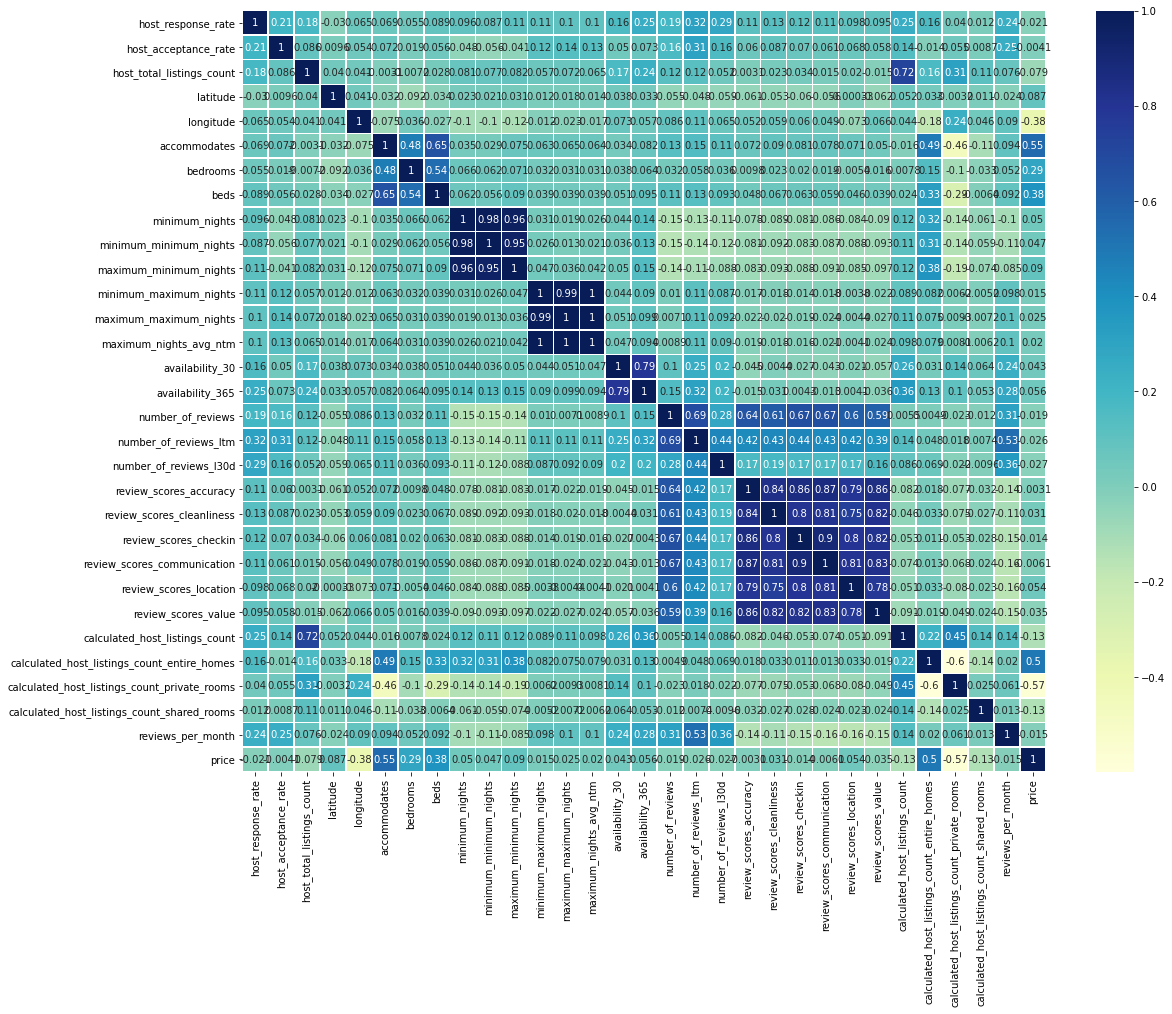

In [418]:
# For regression problem
corr_matrix = num_train.corr(method= 'spearman')

# Plot correlation heatmap

ax = sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True,  linewidths=.5)

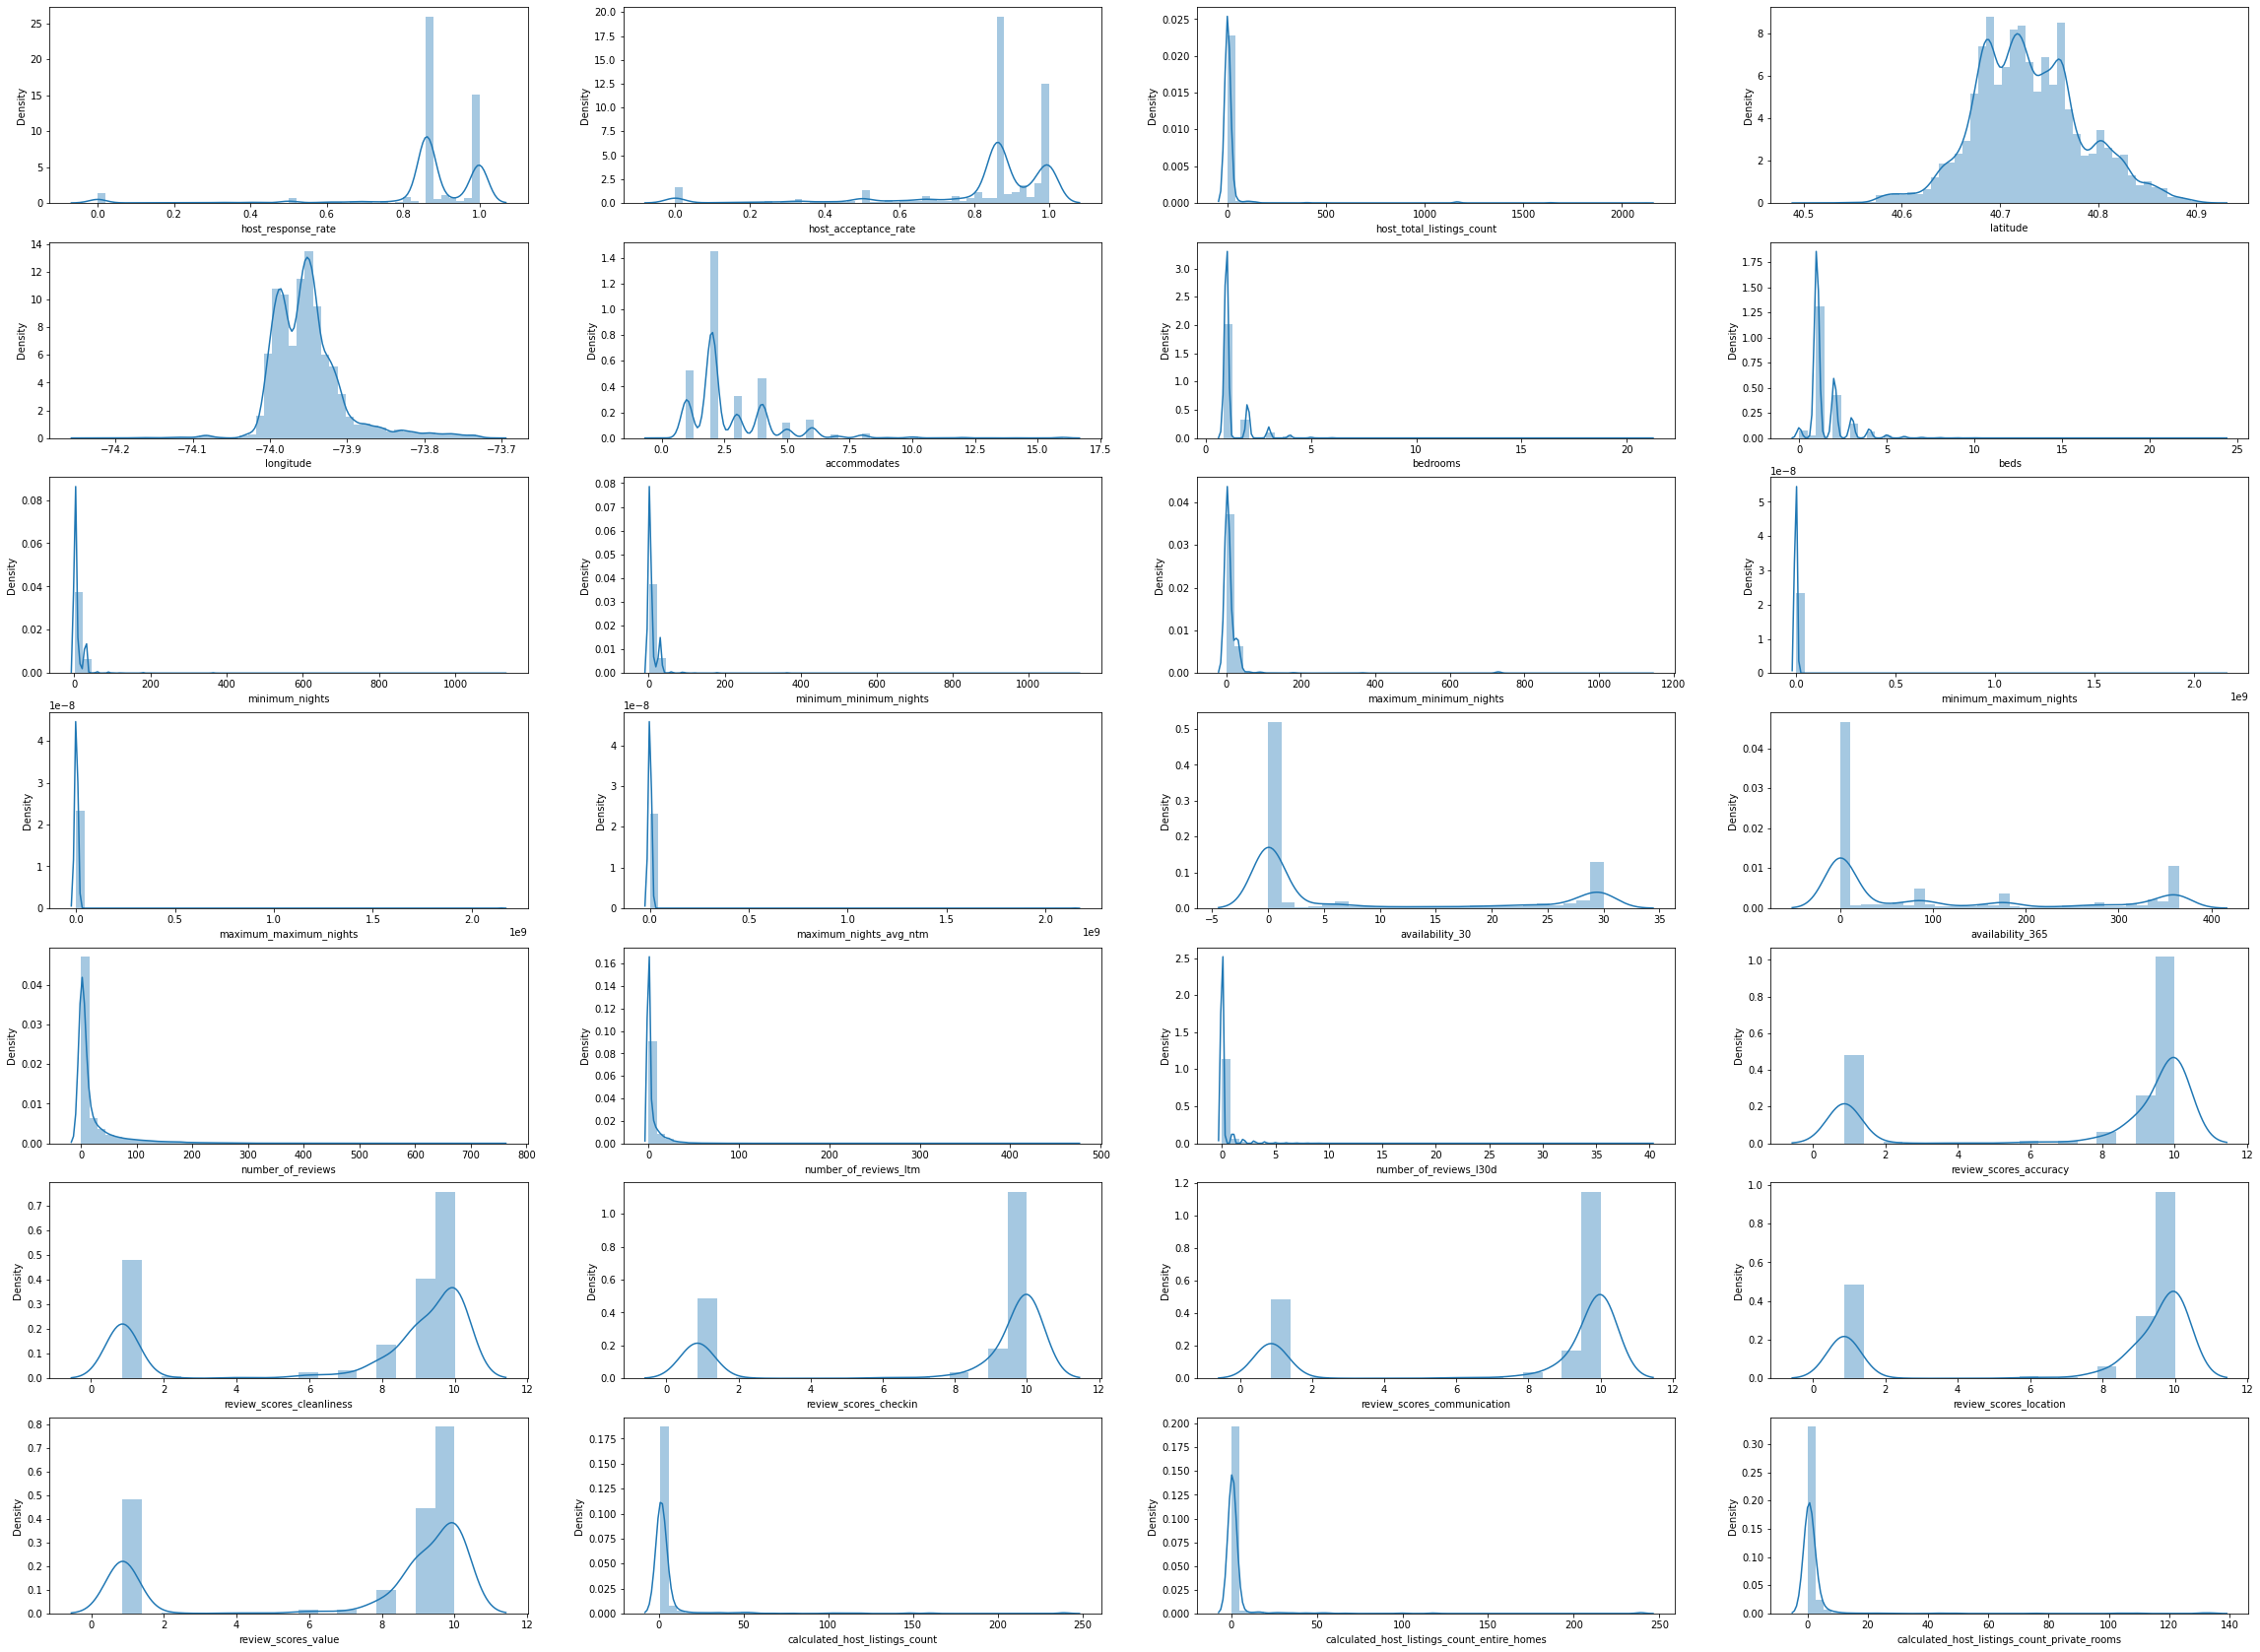

In [419]:
# let's see how data is distributed for every column
plt.figure(figsize=(40,30), facecolor='white')
plotnumber = 1

for column in num_train:
    if plotnumber<=28 :     # as there are 28 columns in the data
        ax = plt.subplot(7,4,plotnumber)
        sns.distplot(num_train[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

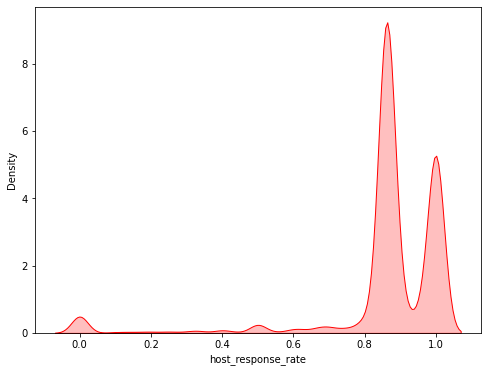

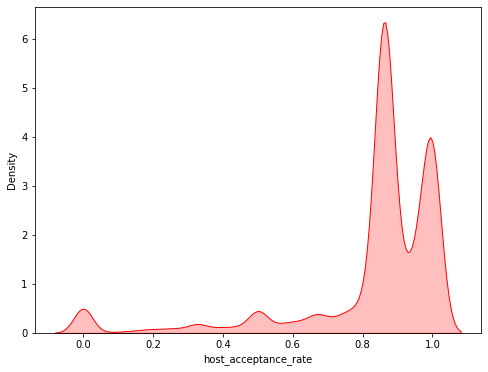

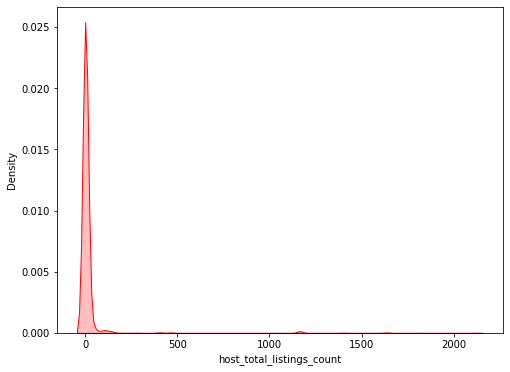

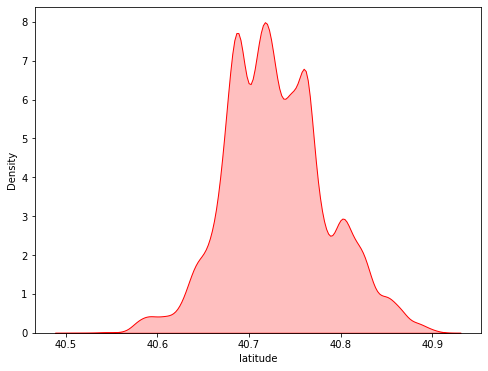

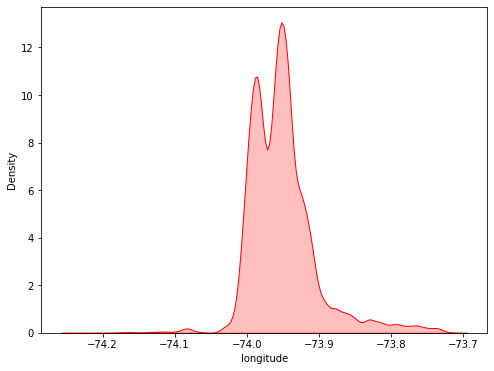

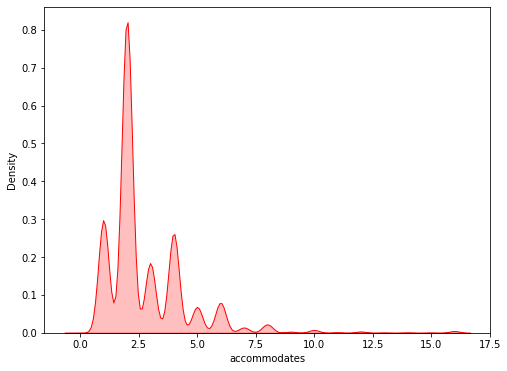

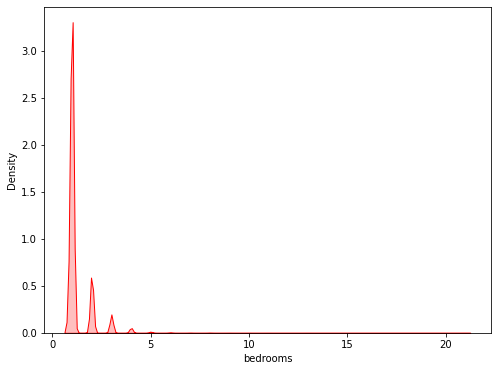

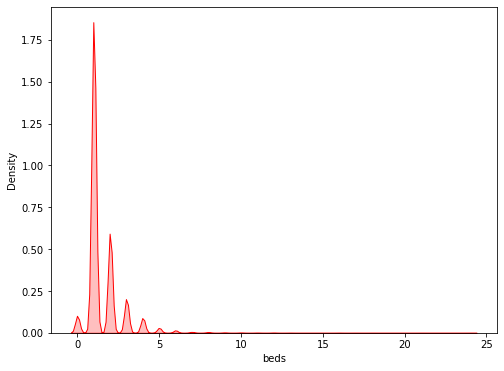

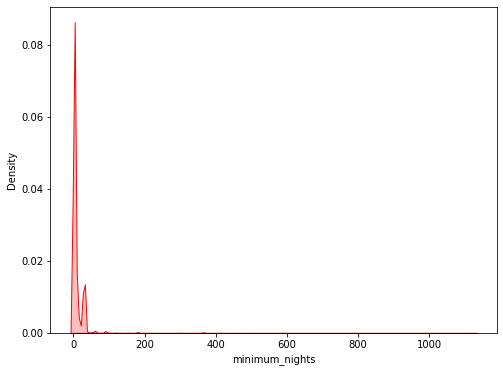

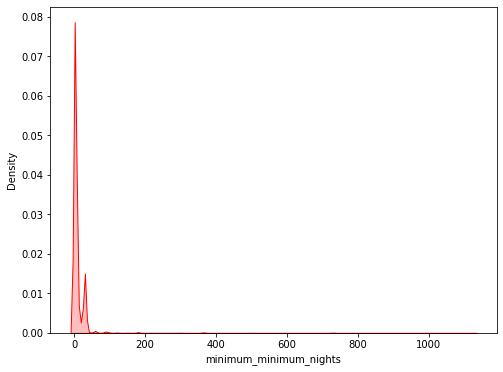

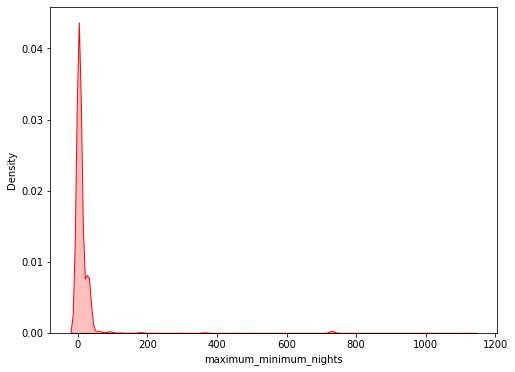

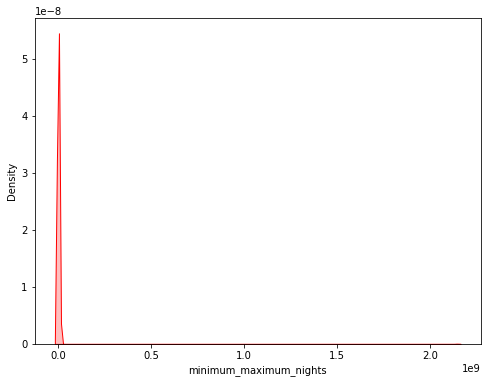

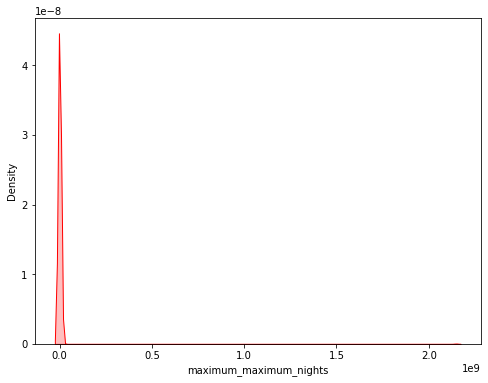

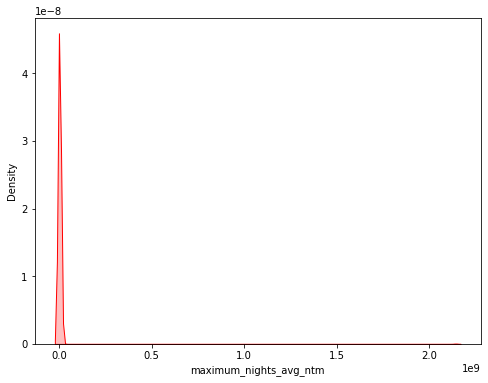

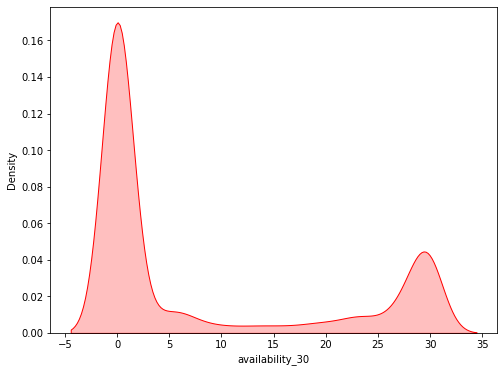

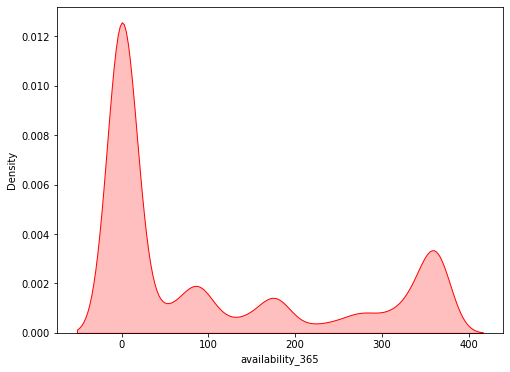

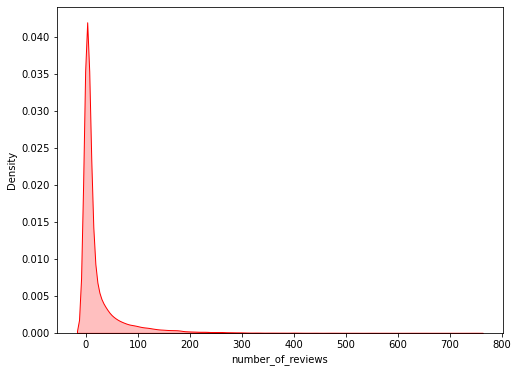

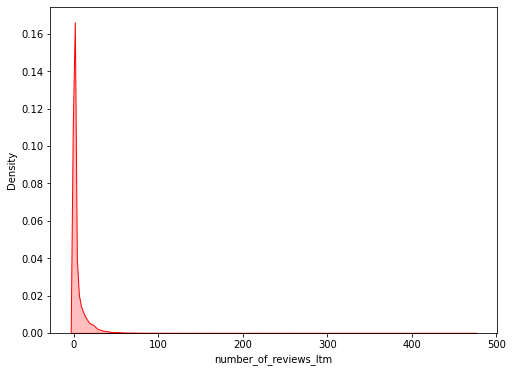

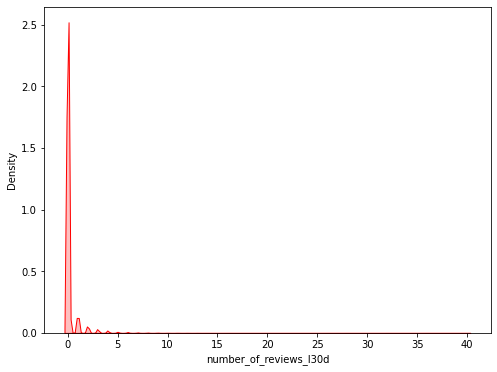

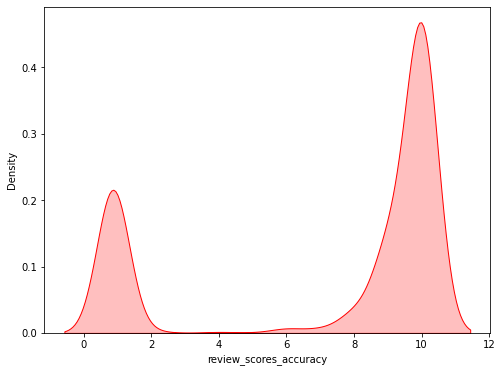

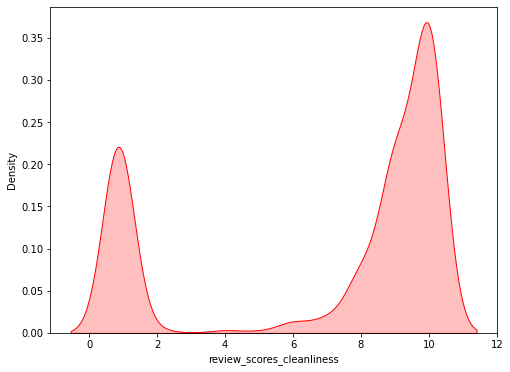

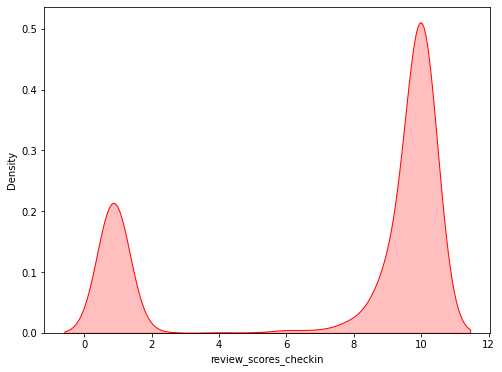

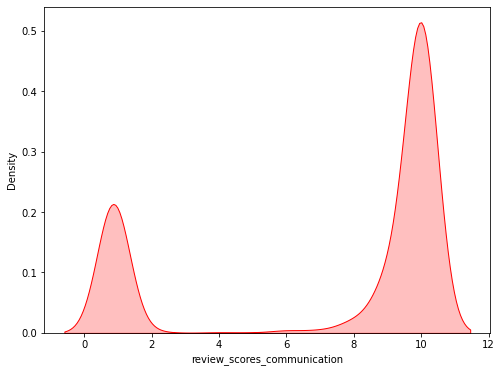

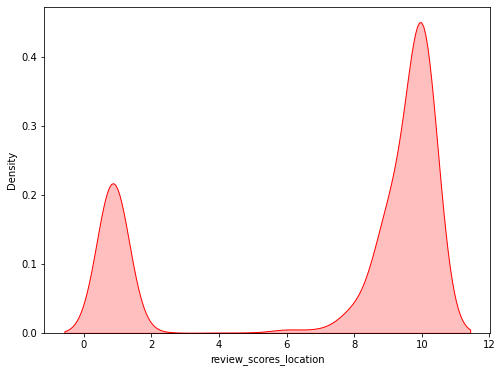

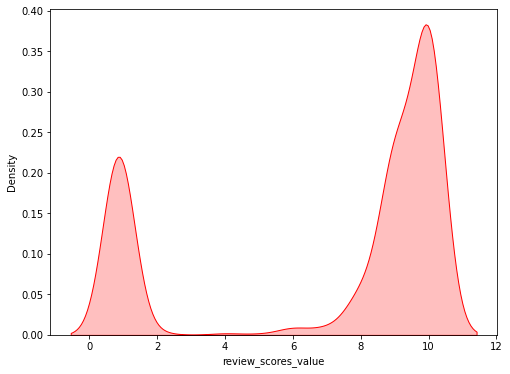

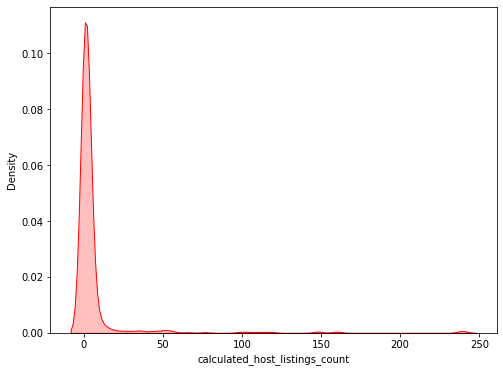

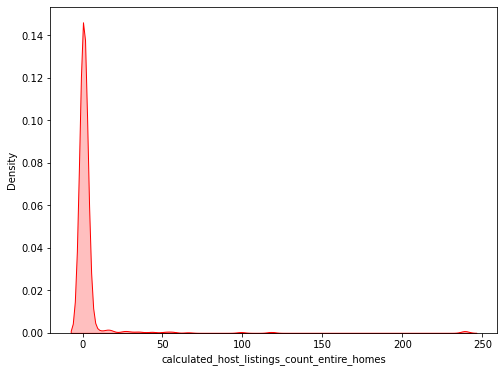

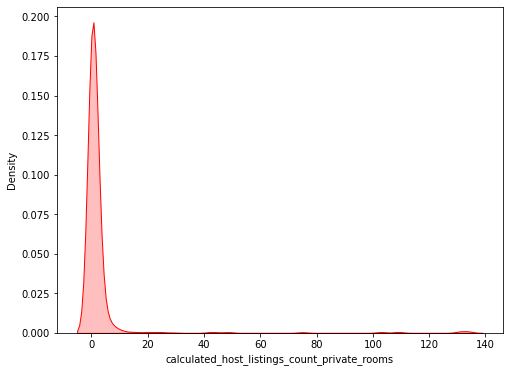

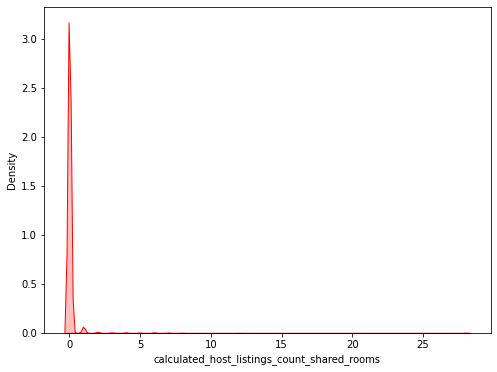

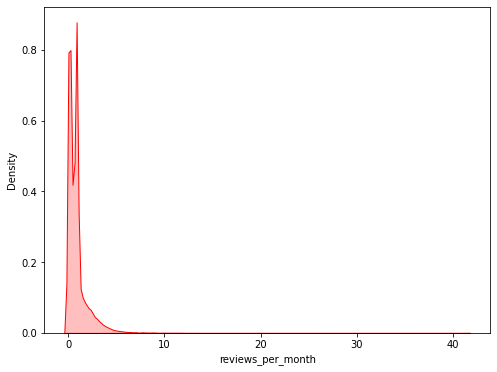

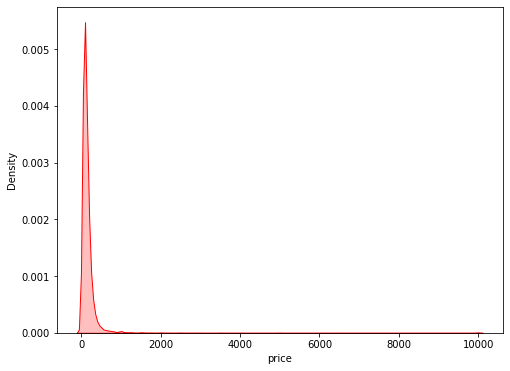

In [420]:
# KDE Plot
for col in num_train.columns:
    plt.figure(figsize= (8,6))
    ax = sns.kdeplot(num_train[col], shade=True, color="r")
    plt.show()

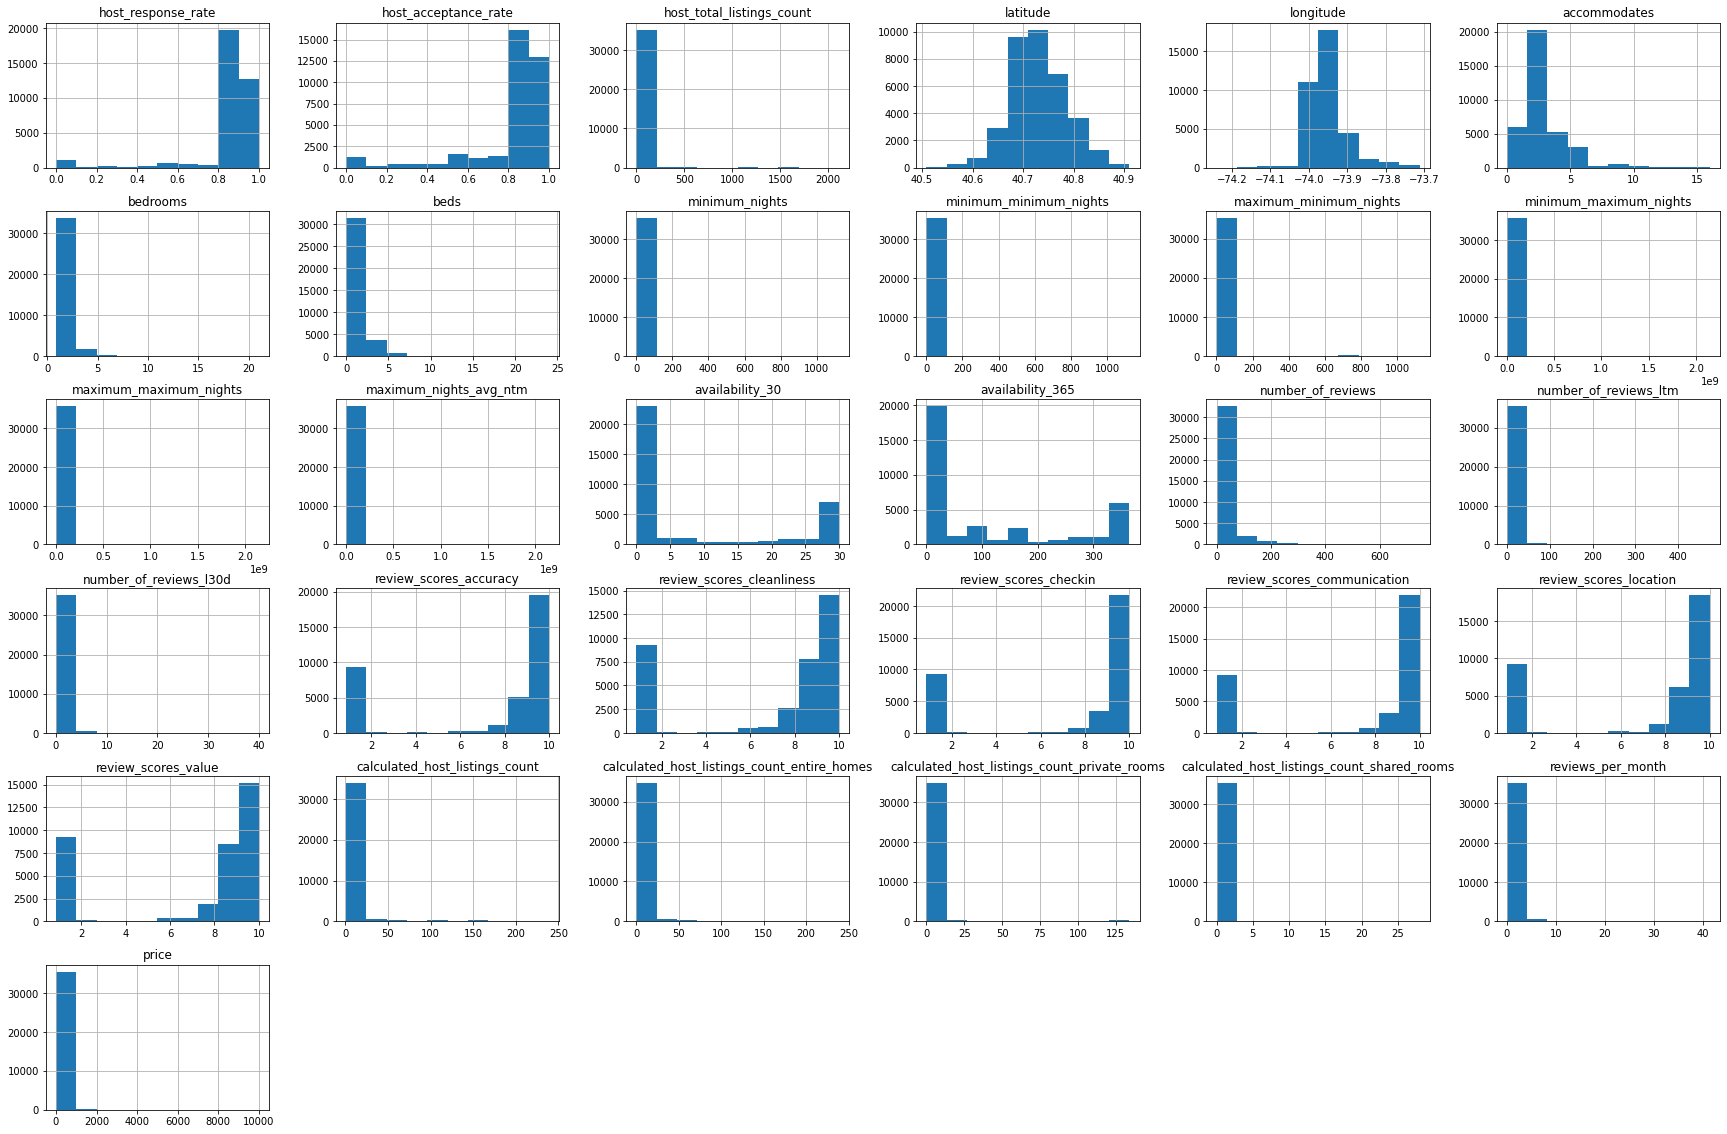

In [421]:
# Visualize histogram of dataset
num_train.hist(figsize= (30,20), bins= 10)
plt.show()

In [422]:
# diagnostic plot to confirm skewness/outliers
def diagnostic_plots(df,variable):
  # functin to plot a histogram and Q-Q plot 
  
  plt.figure(figsize = (15,6))
  plt.subplot(1,2,1)
  df[variable].hist()
  
  plt.subplot(1,2,2)
  stats.probplot(df[variable], dist = "norm", plot = plt)
  
  plt.show()

<Figure size 1296x1008 with 0 Axes>

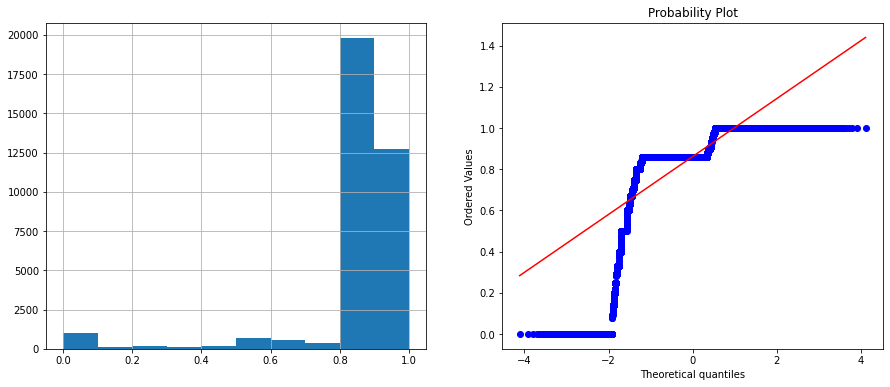

<Figure size 1296x1008 with 0 Axes>

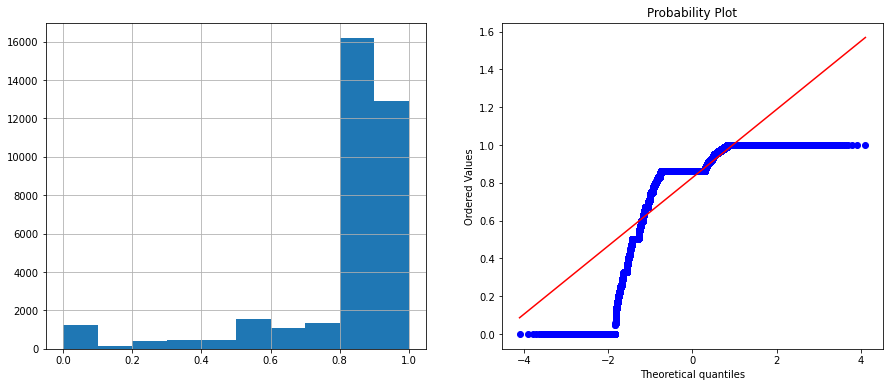

<Figure size 1296x1008 with 0 Axes>

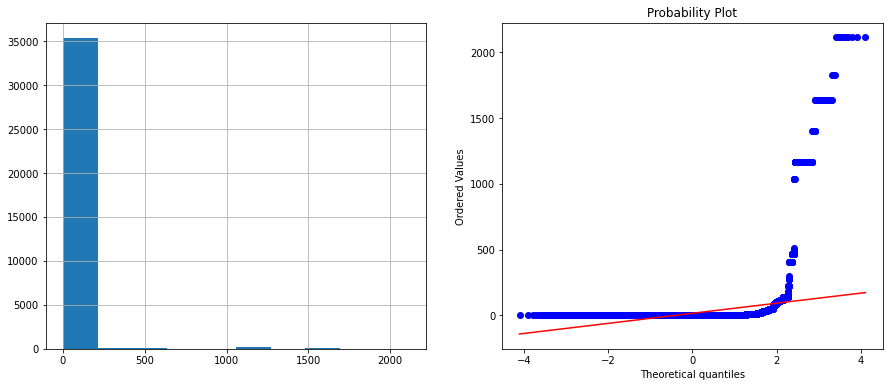

<Figure size 1296x1008 with 0 Axes>

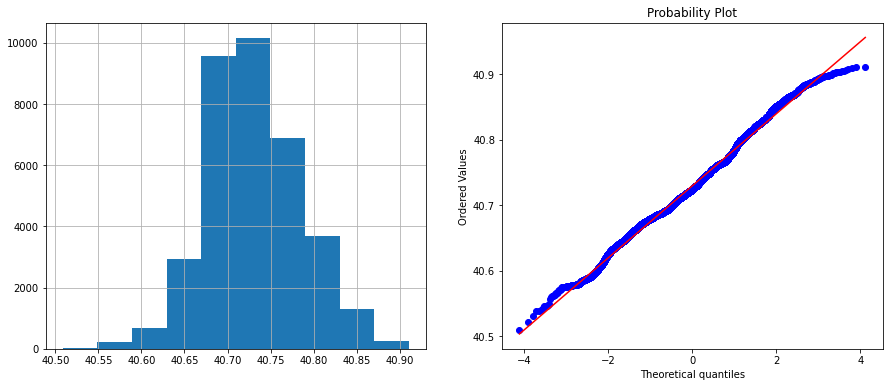

<Figure size 1296x1008 with 0 Axes>

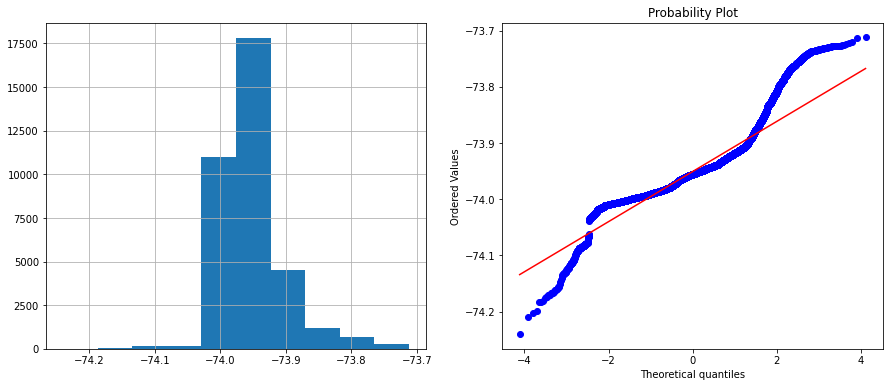

<Figure size 1296x1008 with 0 Axes>

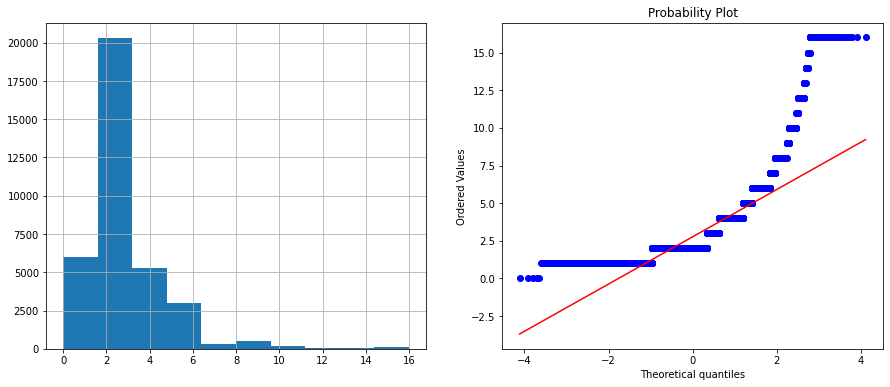

<Figure size 1296x1008 with 0 Axes>

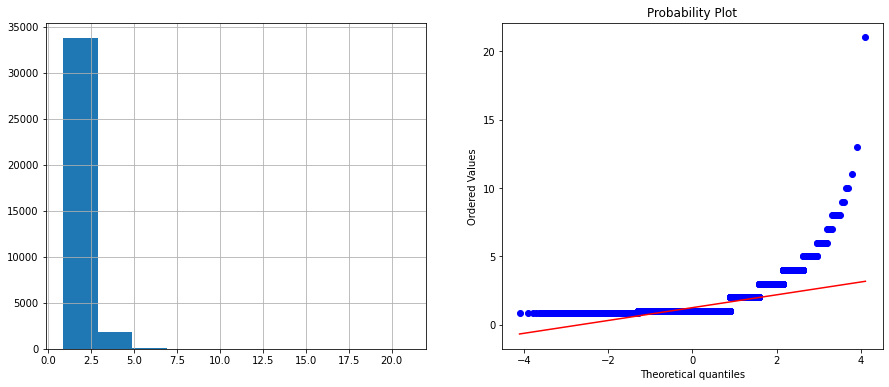

<Figure size 1296x1008 with 0 Axes>

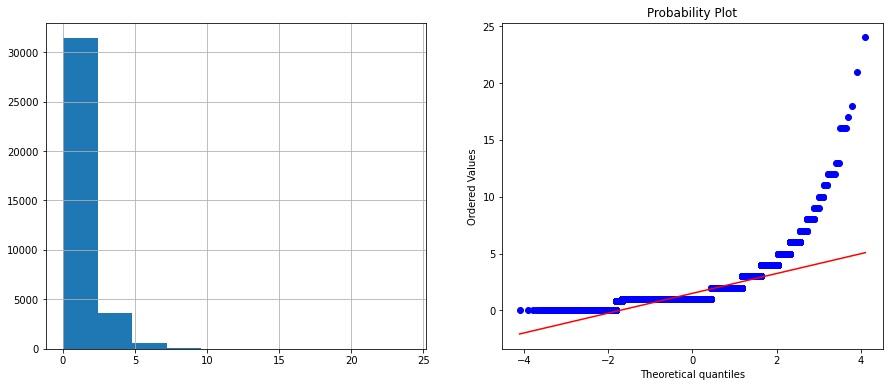

<Figure size 1296x1008 with 0 Axes>

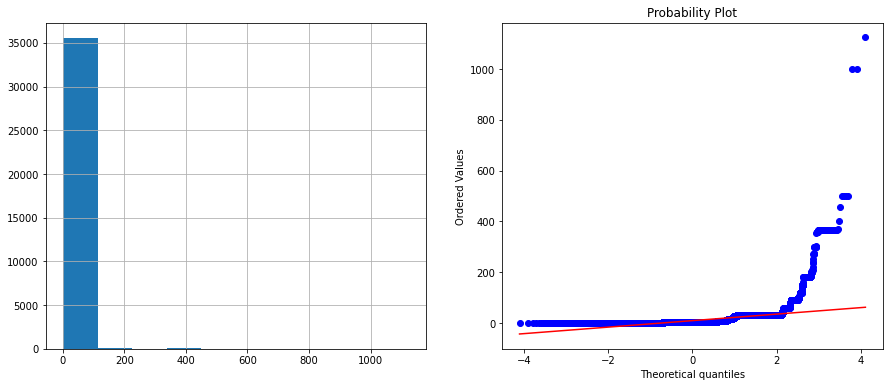

<Figure size 1296x1008 with 0 Axes>

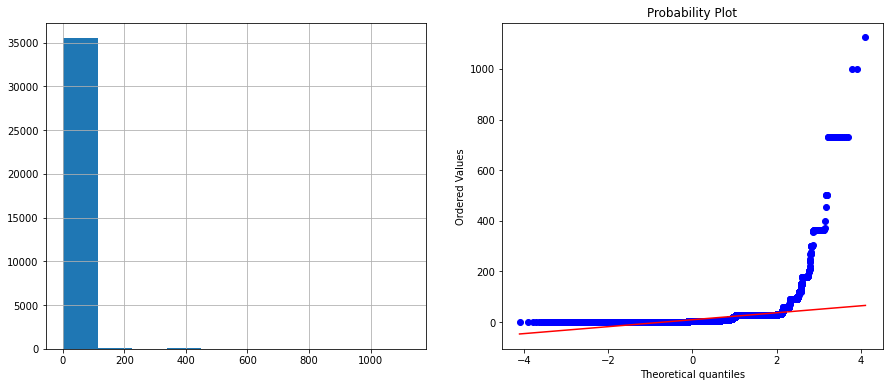

<Figure size 1296x1008 with 0 Axes>

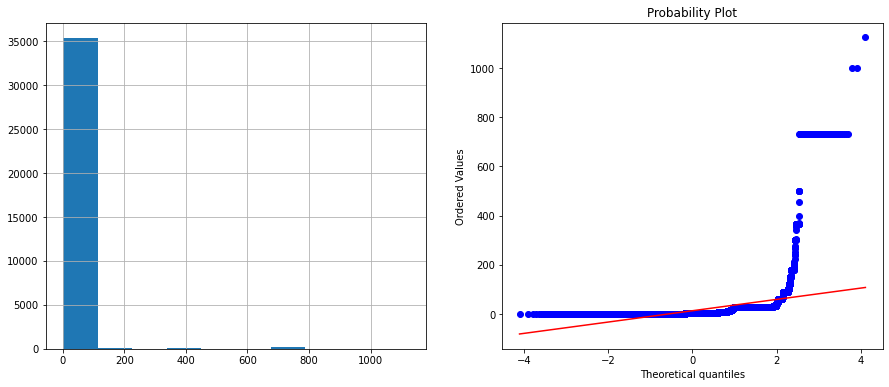

<Figure size 1296x1008 with 0 Axes>

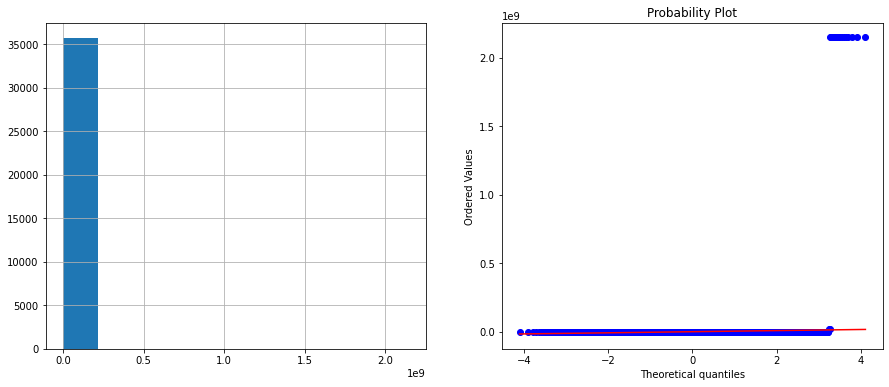

<Figure size 1296x1008 with 0 Axes>

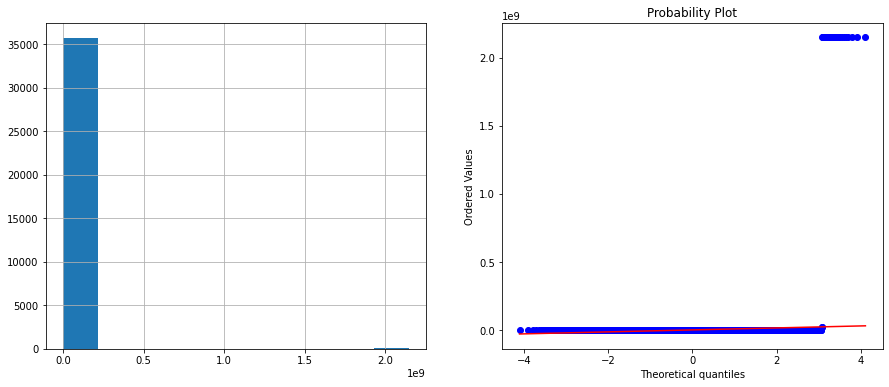

<Figure size 1296x1008 with 0 Axes>

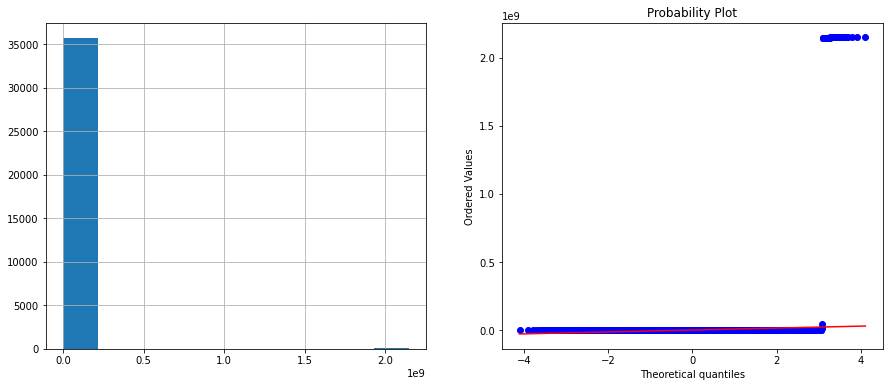

<Figure size 1296x1008 with 0 Axes>

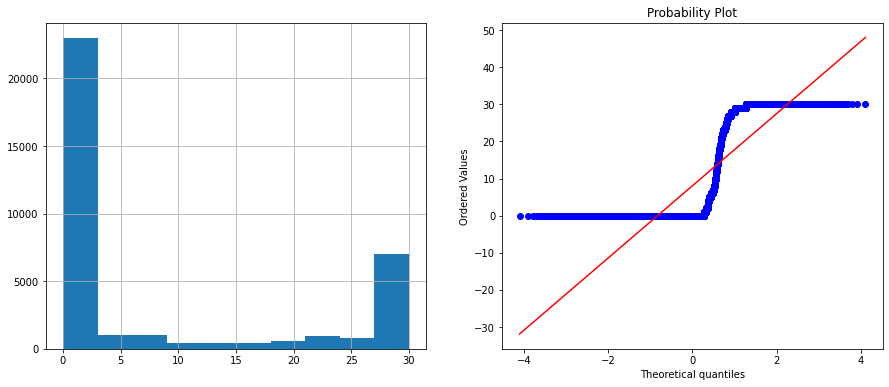

<Figure size 1296x1008 with 0 Axes>

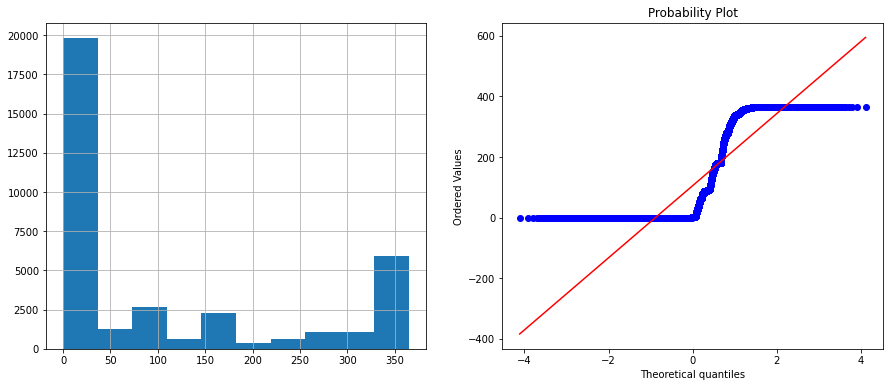

<Figure size 1296x1008 with 0 Axes>

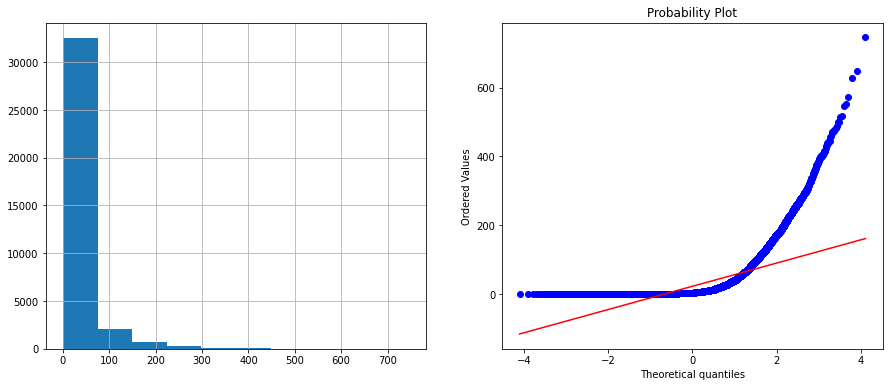

<Figure size 1296x1008 with 0 Axes>

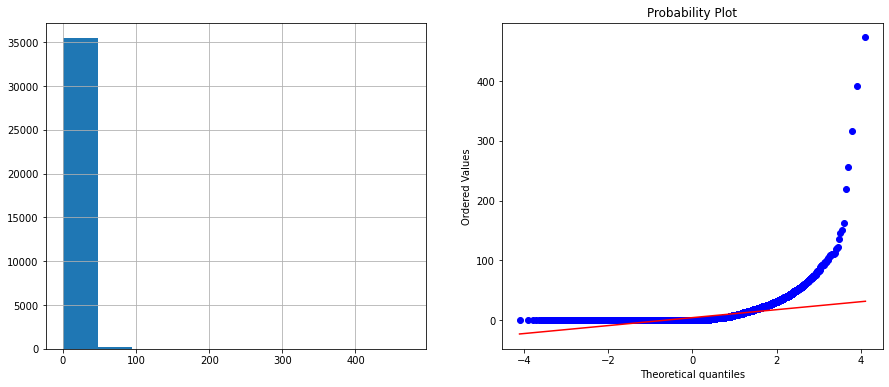

<Figure size 1296x1008 with 0 Axes>

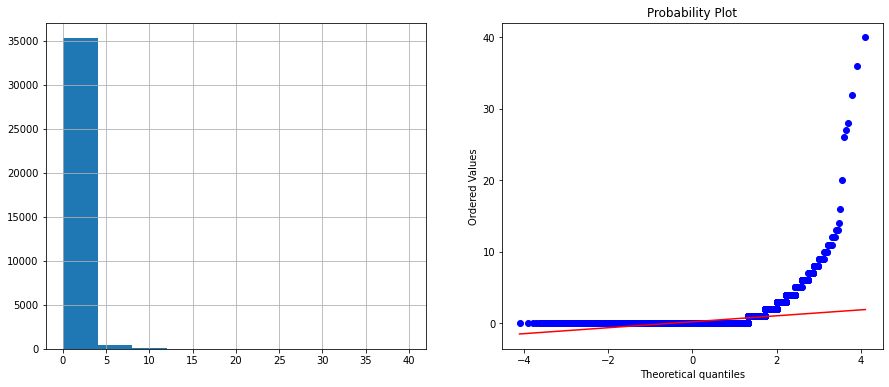

<Figure size 1296x1008 with 0 Axes>

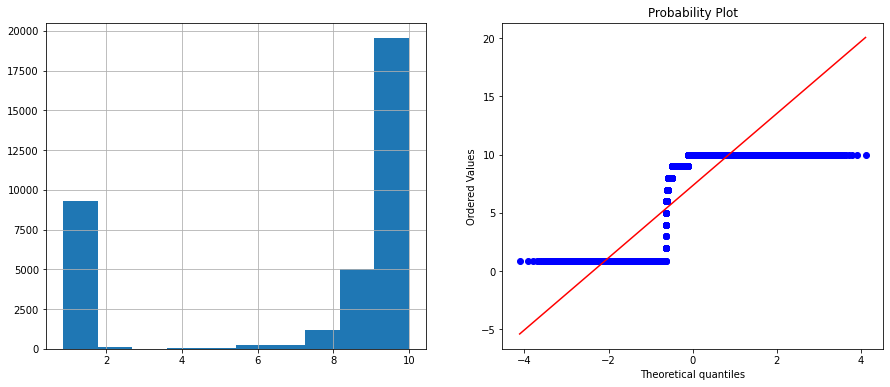

<Figure size 1296x1008 with 0 Axes>

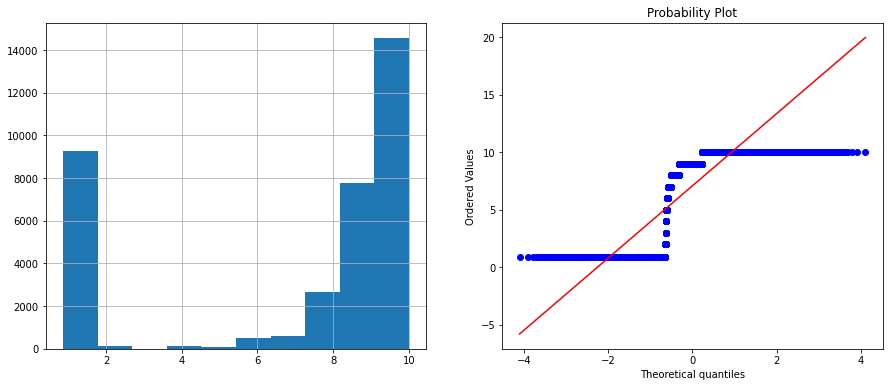

<Figure size 1296x1008 with 0 Axes>

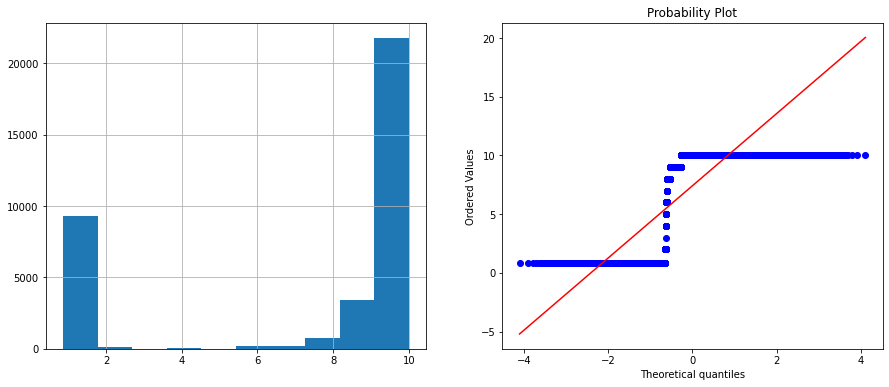

<Figure size 1296x1008 with 0 Axes>

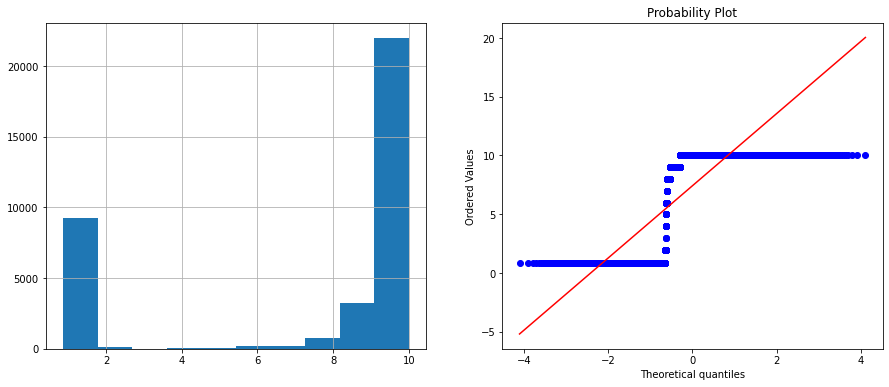

<Figure size 1296x1008 with 0 Axes>

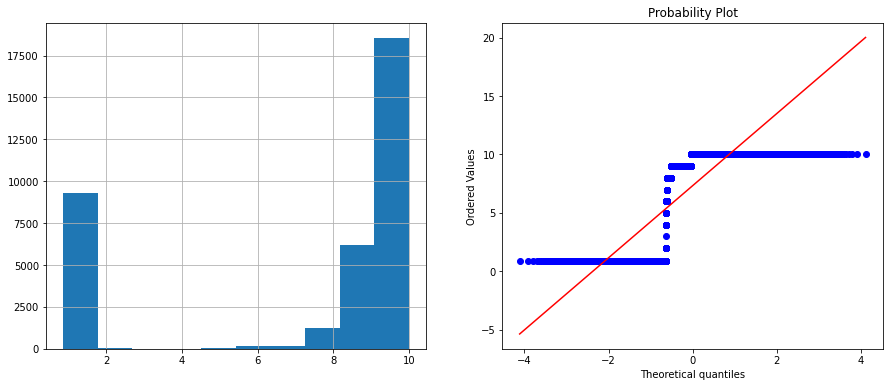

<Figure size 1296x1008 with 0 Axes>

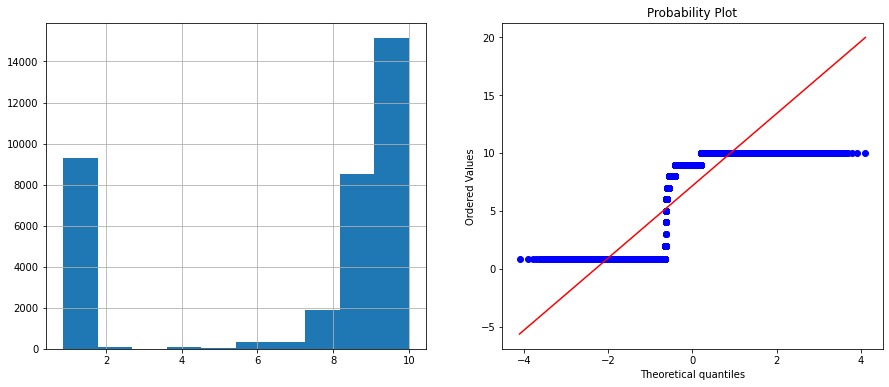

<Figure size 1296x1008 with 0 Axes>

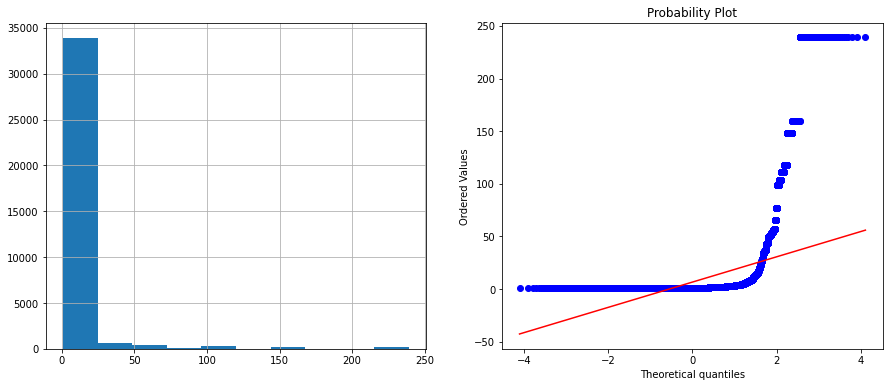

<Figure size 1296x1008 with 0 Axes>

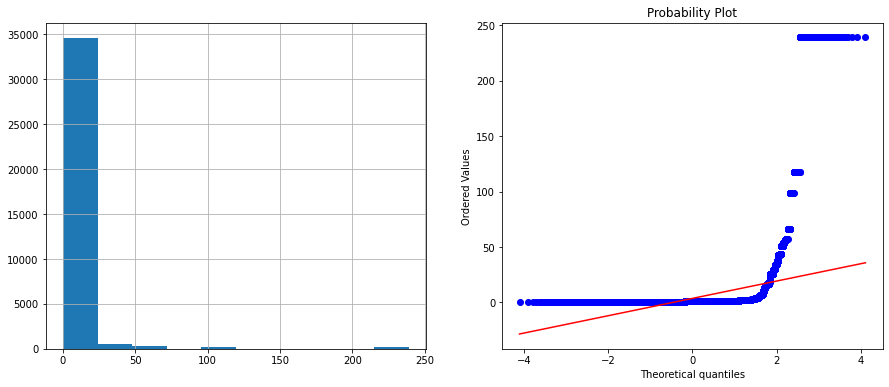

<Figure size 1296x1008 with 0 Axes>

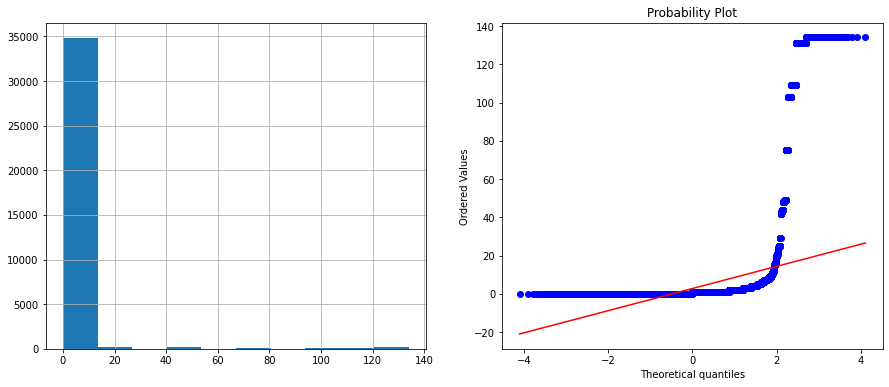

<Figure size 1296x1008 with 0 Axes>

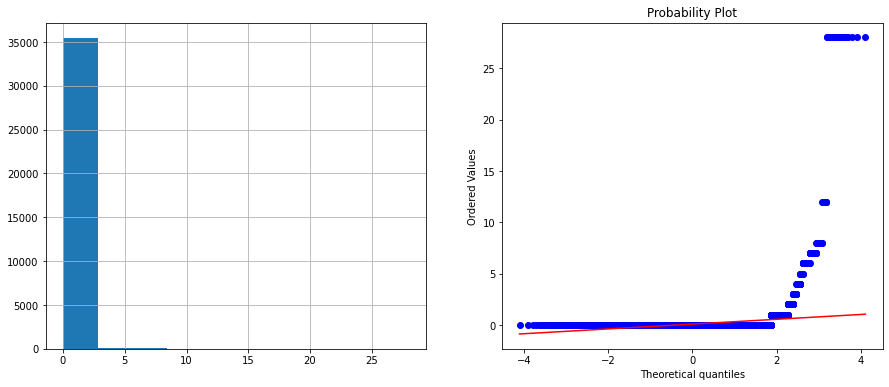

<Figure size 1296x1008 with 0 Axes>

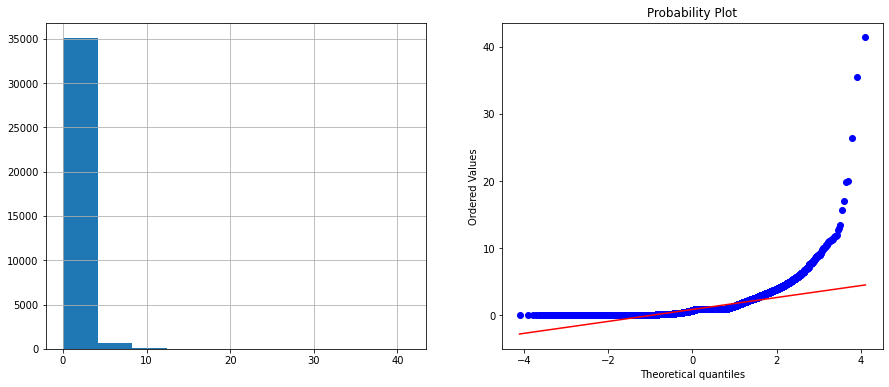

<Figure size 1296x1008 with 0 Axes>

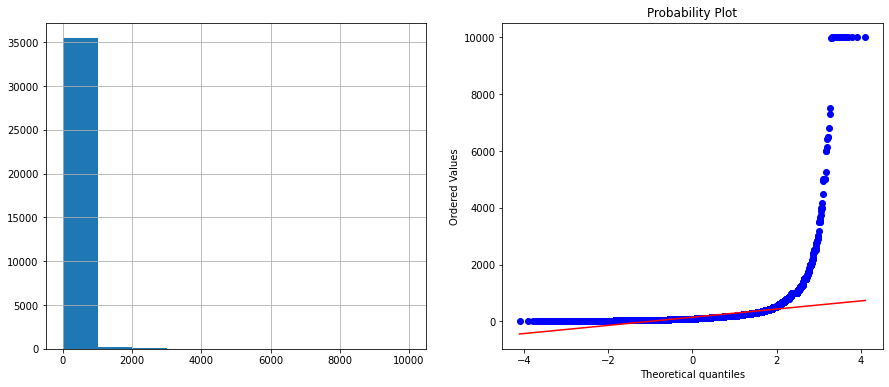

In [423]:
# Confirm skewness with Q-Q plot for all numerical columns
for i,cols in enumerate(num_train.columns):
    plt.figure(i)
    diagnostic_plots(num_train, cols)
    plt.show()

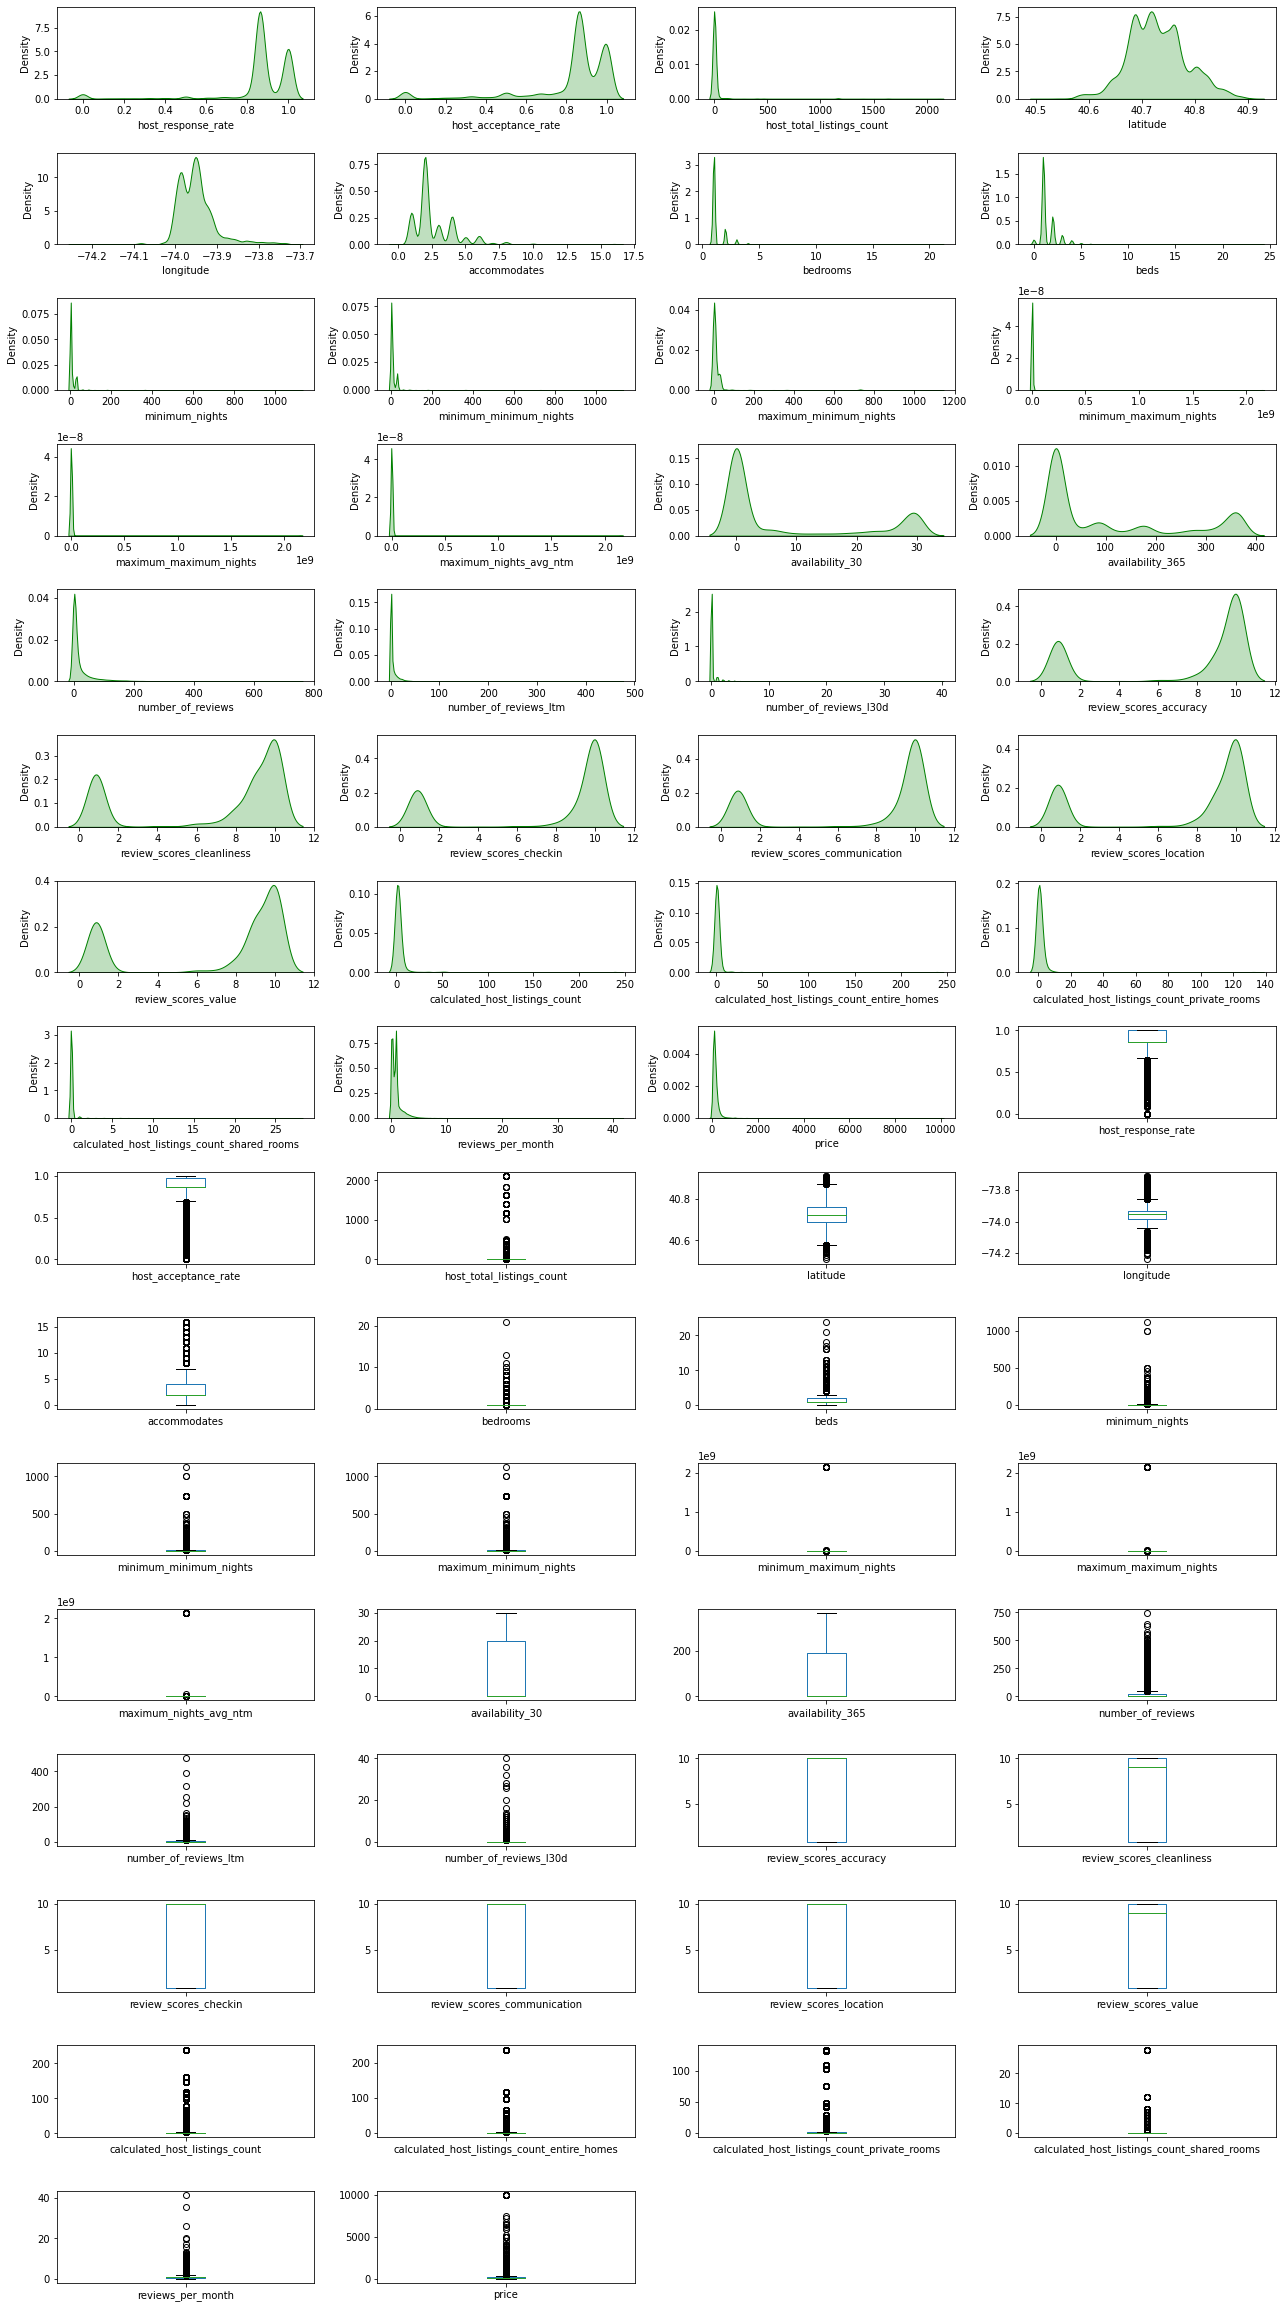

,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price
skewness,-3.212575,-2.356318,11.168988,0.225187,1.378141,2.577353,4.033391,3.470741,14.920431,16.659205,11.223352,43.332274,31.457870,31.904787,1.007455,0.918440,3.974457,9.472685,12.808857,-1.000408,-0.932750,-1.024919,-1.025380,-1.014199,-0.971495,6.658438,9.746966,7.989467,22.579991,5.660772,21.012058
kurtosis,11.332623,5.492930,134.430991,0.106051,4.558171,11.122734,39.764098,26.454699,414.982213,397.224620,135.144773,1875.807811,987.657602,1015.993416,-0.818817,-0.825404,22.384706,262.279083,344.901927,-0.920272,-0.986951,-0.895030,-0.894713,-0.893295,-0.943515,49.812464,105.262282,66.095969,637.932583,103.479450,593.256341


In [425]:
# Visual exploration of numerical colums
plt.figure(figsize= (18,40))

for i,col in enumerate(num_train.columns,1):
    plt.subplot(20,4,i)
    sns.kdeplot(num_train[col],color='g',shade=True)
    plt.subplot(20,4, i+len(num_train.columns))
    num_train[col].plot.box()
plt.tight_layout() 
plt.show()


num_data = num_train[num_train.columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])


## Visualize relationship between each numerical varaible and price_usd

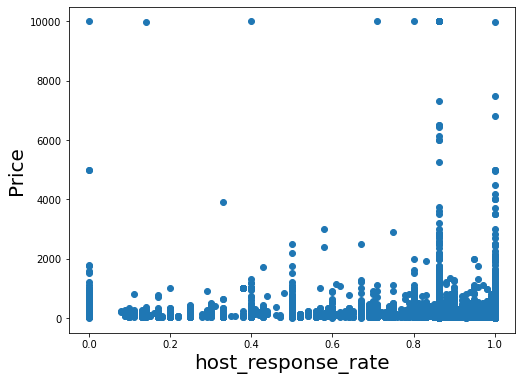

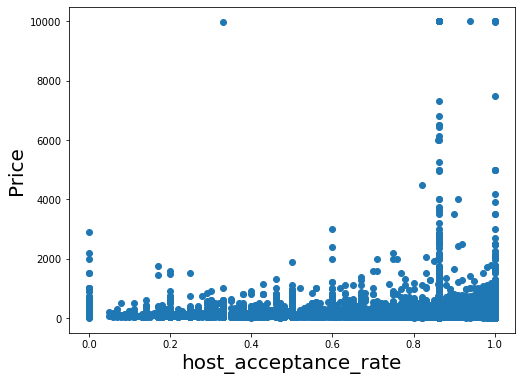

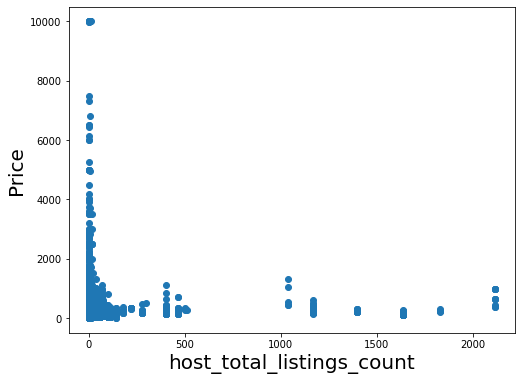

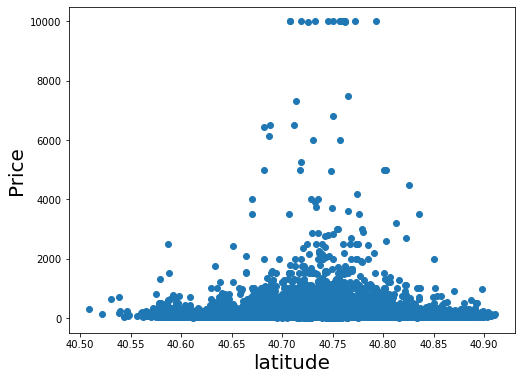

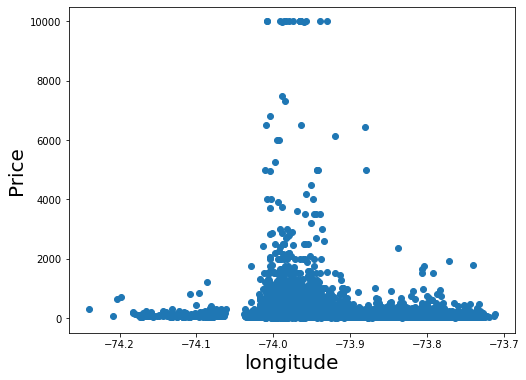

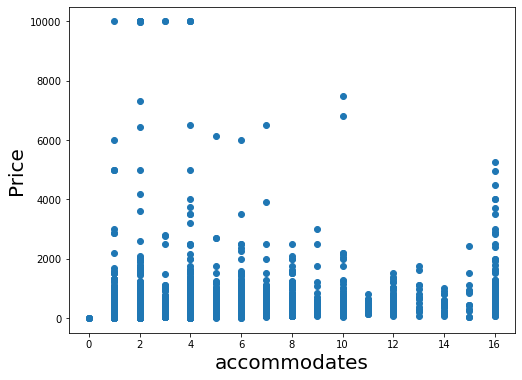

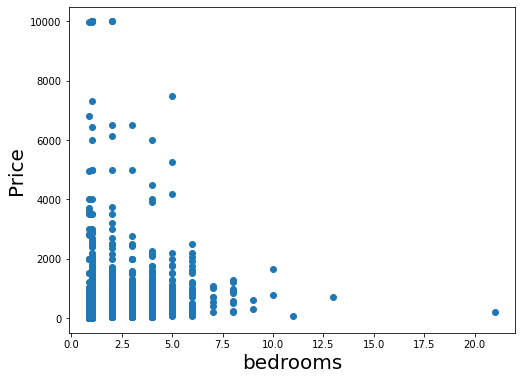

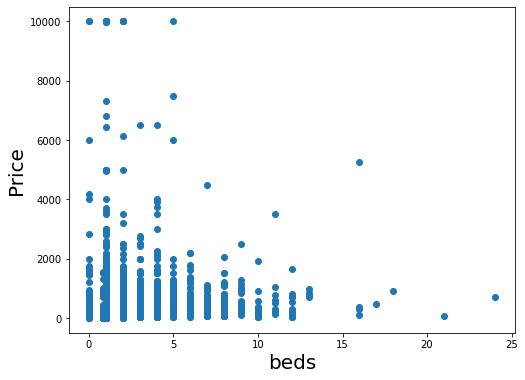

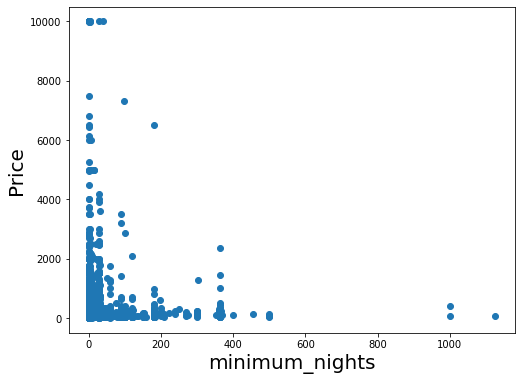

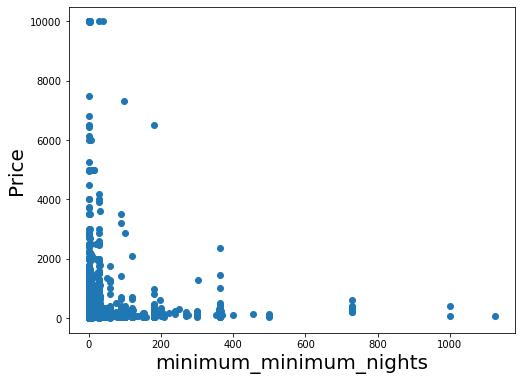

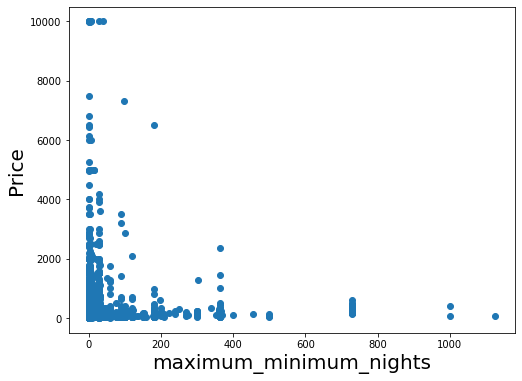

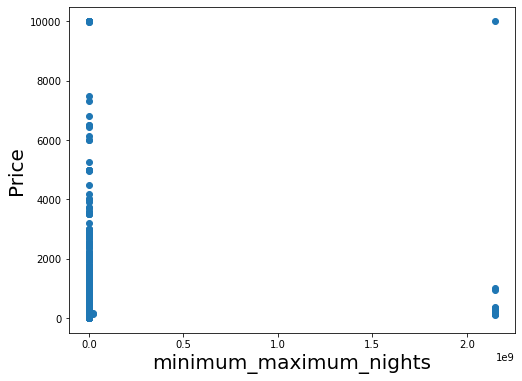

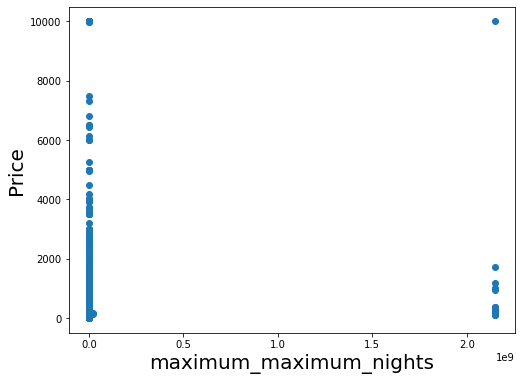

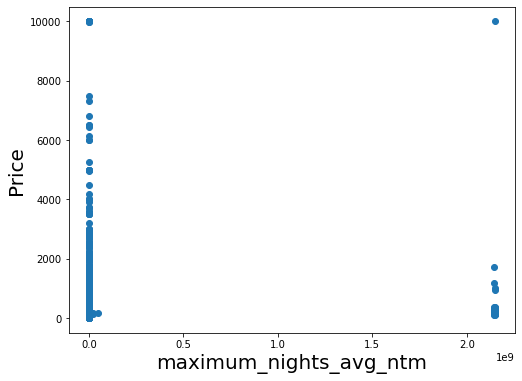

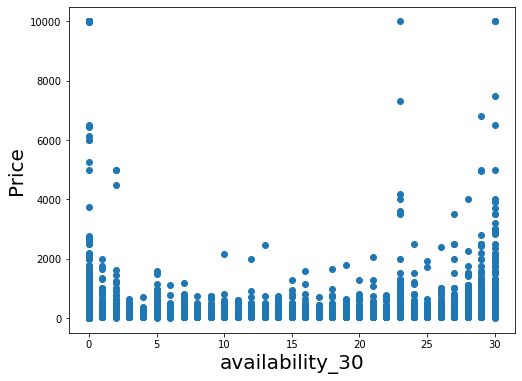

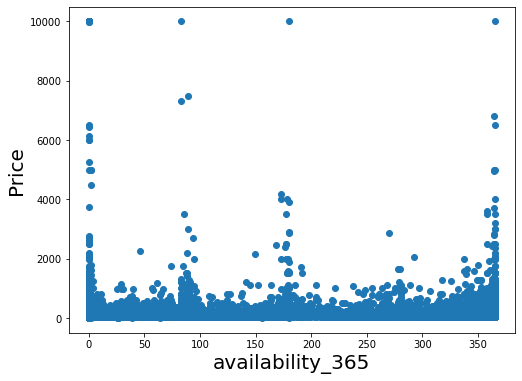

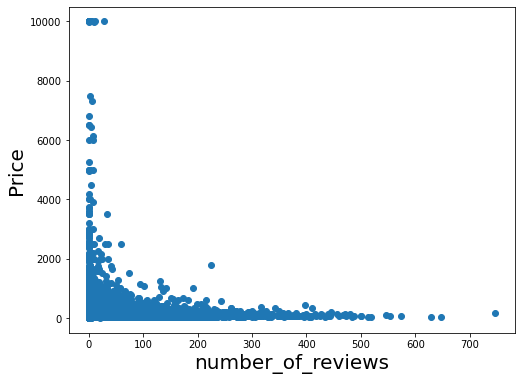

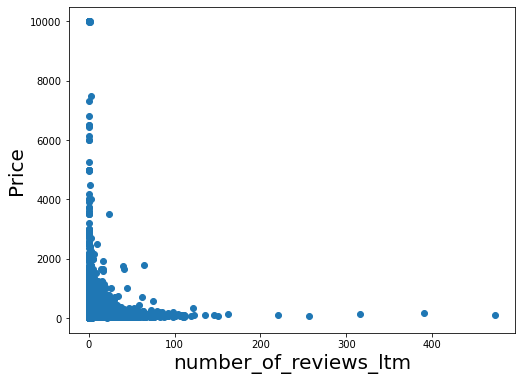

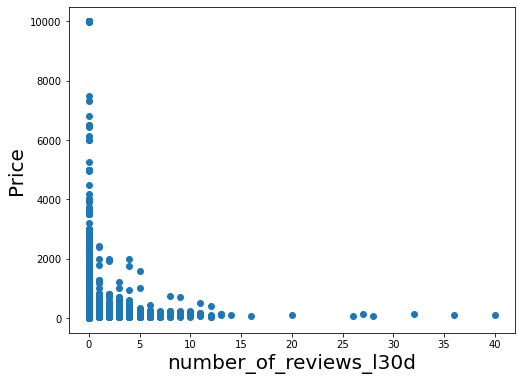

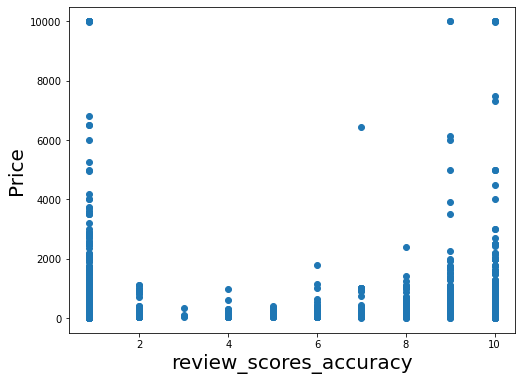

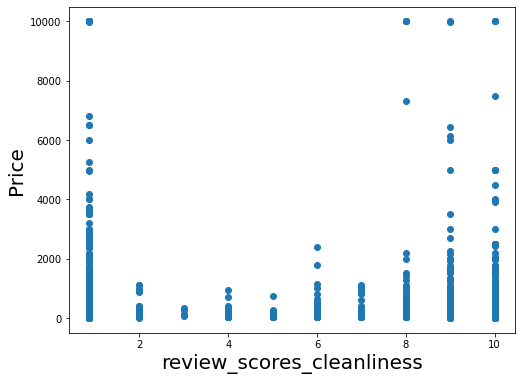

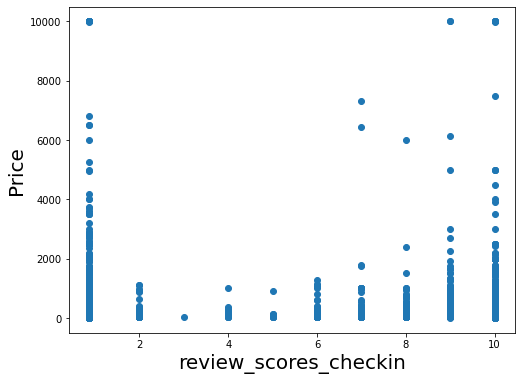

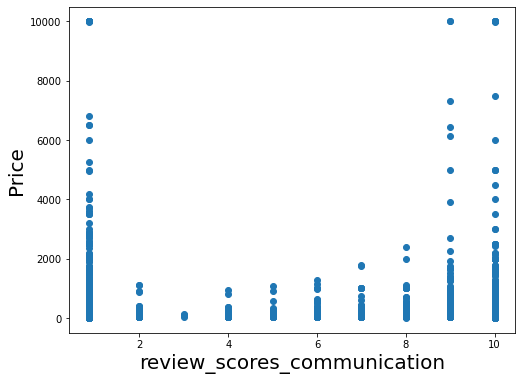

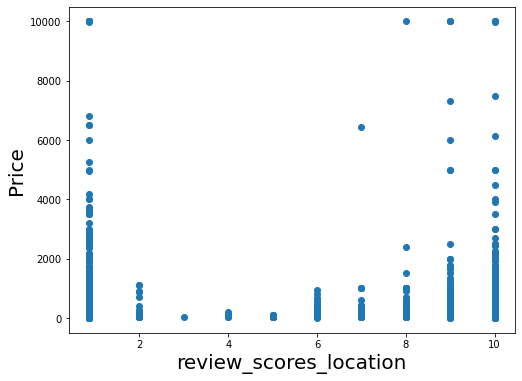

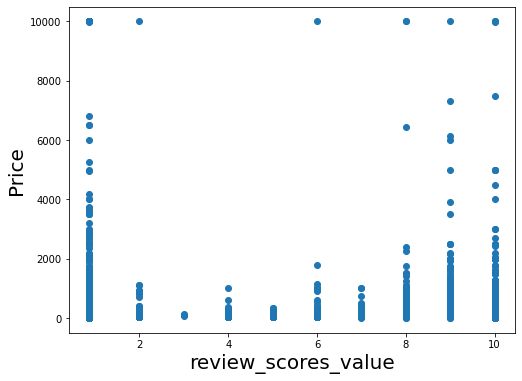

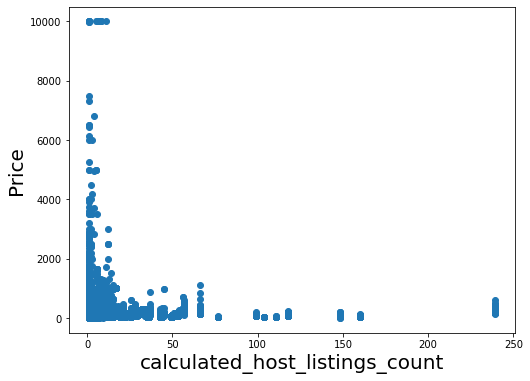

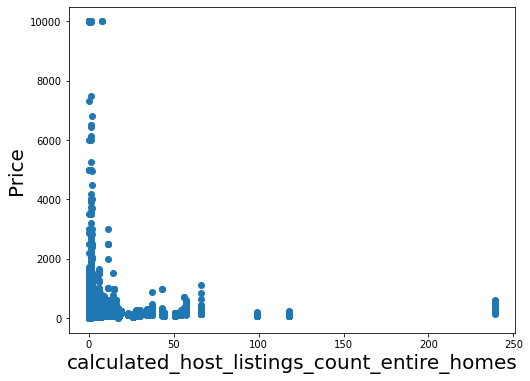

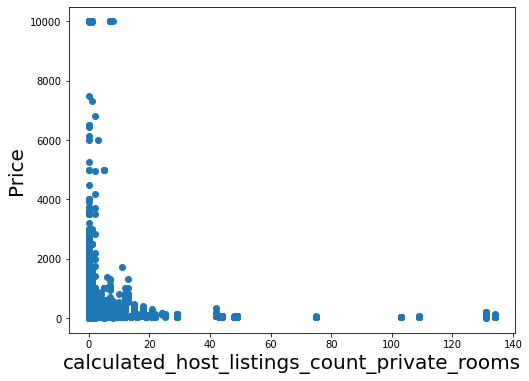

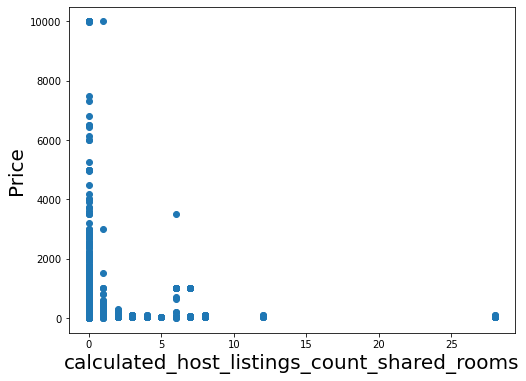

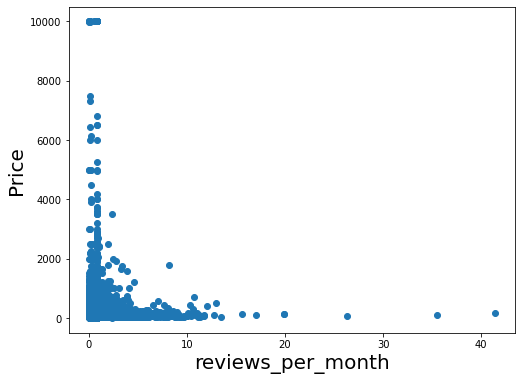

In [432]:
# create X and y
X = num_train.iloc[:, :-1]
y = num_train.iloc[:,-1]


for col in numerical_features:
    plt.figure(figsize= (8,6))
    ax = plt.scatter(X[col],y)
    plt.xlabel(col,fontsize=20)
    plt.ylabel('Price',fontsize=20)
    plt.show()


In [433]:
for cols in numerical_features:
   pearson_coef, p_value = stats.pearsonr(num_train[cols], num_train['price'])
   print(cols)
   print("The Pearson coefccient for odometer_value is", pearson_coef, "with a P-value of P=", p_value)
   print("*"*30)

host_response_rate
The Pearson coefccient for odometer_value is -0.027701292949696518 with a P-value of P= 1.63120309321684e-07
******************************
host_acceptance_rate
The Pearson coefccient for odometer_value is 0.0012503158298999978 with a P-value of P= 0.8131730475740141
******************************
host_total_listings_count
The Pearson coefccient for odometer_value is 0.03776194771435447 with a P-value of P= 9.312483657012838e-13
******************************
latitude
The Pearson coefccient for odometer_value is 0.027834405404150997 with a P-value of P= 1.4228424705501535e-07
******************************
longitude
The Pearson coefccient for odometer_value is -0.10269037577221604 with a P-value of P= 2.306732305225755e-84
******************************
accommodates
The Pearson coefccient for odometer_value is 0.2521593085361222 with a P-value of P= 0.0
******************************
bedrooms
The Pearson coefccient for odometer_value is 0.20882939867063094 with a P-v